In [1]:
import warnings
warnings.filterwarnings('ignore')

import random, re, time, xgboost
import numpy as np
from numpy.linalg import svd
import pandas as pd
import cx_Oracle

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency, skew
from sklearn.datasets import load_iris, make_classification, load_breast_cancer, load_boston, make_blobs
from sklearn import datasets, tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer, PolynomialFeatures

from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, confusion_matrix, f1_score, classification_report,\
    precision_recall_curve, roc_auc_score, mean_squared_error, r2_score,\
    mean_absolute_error, silhouette_samples, silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import plot_importance, XGBClassifier, XGBRegressor

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor, LGBMClassifier

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

from surprise import Reader, Dataset, SVD, accuracy, SVDpp
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise.dataset import DatasetAutoFolds

In [2]:
ddemo = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\DEMO15_최종.csv', encoding='EUC-KR')

In [3]:
# ddemo = pd.read_excel(r'D:\hmkd1\m1_programming\프젝 sql\DEMO15_최종.xlsx')

In [4]:
df = ddemo.copy()
df.고객번호 = df.고객번호.astype('str')
df

,고객번호,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,...,A사비율48,B사비율48,C사비율48,D사비율48,구매최근15,구매최근26,구매최근37,구매최근6,구매최근7,구매최근8
0,1.0,M,노년층,서울,X,충성고객,15.0,1.0,0.0,0.0,...,0.760709,0.088626,0.150665,0.000000,3.0,4.0,9.0,4.0,9.0,2.0
1,2.0,M,노년층,서울,X,충성고객,8.0,1.0,1.0,1.0,...,0.945141,0.023511,0.000000,0.031348,1.0,7.0,2.0,7.0,2.0,2.0
2,3.0,M,노년층,서울,X,충성고객,NaN,1.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,1.0,2.0,9.0,2.0,9.0,4.0
3,4.0,F,노년층,서울,X,충성고객,3.0,1.0,0.0,0.0,...,0.676522,0.156522,0.166957,0.000000,2.0,1.0,1.0,1.0,1.0,1.0
4,5.0,M,노년층,서울,X,비충성고객,NaN,0.0,0.0,0.0,...,0.969828,0.000000,0.000000,0.030172,3.0,41.0,133.0,41.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,19380.0,F,학생층,서울,O,비충성고객,NaN,1.0,1.0,1.0,...,0.006818,0.015909,0.095455,0.881818,3.0,1.0,2.0,1.0,2.0,2.0
19380,19381.0,F,중년층,부산,O,비충성고객,NaN,1.0,1.0,1.0,...,0.006211,0.982609,0.011180,0.000000,1.0,2.0,2.0,2.0,2.0,1.0
19381,19382.0,F,장년층,부산,X,비충성고객,NaN,1.0,1.0,1.0,...,0.004415,0.992274,0.003311,0.000000,2.0,1.0,3.0,1.0,3.0,1.0
19382,19383.0,F,청년층,경남,O,비충성고객,NaN,1.0,1.0,1.0,...,0.069231,0.061538,0.011538,0.857692,0.0,5.0,3.0,5.0,3.0,1.0


In [5]:
a = df.columns
for i in a:
    print(f"{i}", end="','")

고객번호','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','TARGET_15','TARGET_26','TARGET_37','TARGET_16','TARGET_27','TARGET_38','계절총액_15','계절총액_26','계절총액_37','계절총액_48','등급_15','등급_26','등급_37','등급_48','등급_6','등급_7','등급_8','월평균액_15','월평균액_26','월평균액_37','월평균액_6','월평균액_7','월평균액_8','평균구매품목수15','평균구매품목수26','평균구매품목수37','평균구매품목수6','평균구매품목수7','평균구매품목수8','총방문횟수15','총방문횟수26','총방문횟수37','총방문횟수48','주말비율15','주말비율26','주말비율37','주말비율6','주말비율7','주말비율8','심야비율_15','오전비율_15','오후비율_15','저녁비율_15','새벽비율_15','심야비율_26','오전비율_26','오후비율_26','저녁비율_26','새벽비율_26','심야비율_37','오전비율_37','오후비율_37','저녁비율_37','새벽비율_37','심야비율_6','오전비율_6','오후비율_6','저녁비율_6','새벽비율_6','심야비율_7','오전비율_7','오후비율_7','저녁비율_7','새벽비율_7','심야비율_8','오전비율_8','오후비율_8','저녁비율_8','새벽비율_8','C0_누적_15','C0_절대_15','C0_누적_26','C0_절대_26','C0_누적_37','C0_절대_37','C0_누적_48','C0_절대_48','C1_누적_15','C1_절대_15','C1_누적_26','C1_절대_26','C1_누적_37','C1_절대_37','C1_누적_48','C1_절대_48','C2_누적_15','C2_절대_15','C2_누적_26','C2_절대_26','C2_누적_37','C2_절대_37','C2_누적_48','C2_절대_48','C3_누적_15','C3_절대_15','C

In [6]:
# 소수점 2자리까지만
df[['A사비율15','B사비율15','C사비율15','A사비율26','B사비율26','C사비율26','A사비율37','B사비율37','C사비율37','A사비율48','B사비율48','C사비율48','D사비율15','D사비율26','D사비율37','D사비율48']] = round(df[['A사비율15','B사비율15','C사비율15','A사비율26','B사비율26','C사비율26','A사비율37','B사비율37','C사비율37','A사비율48','B사비율48','C사비율48','D사비율15','D사비율26','D사비율37','D사비율48']],2)

In [7]:
# 널값 처리
df = df.dropna(subset=['고객번호'])
df = df.dropna(subset=['성별'])
df['거주지역'] = df['거주지역'].fillna('-')
df = df.fillna(0)

In [8]:
df.isnull().sum().sort_values(ascending=False)

고객번호        0
C9_절대_15    0
C7_누적_48    0
C7_절대_48    0
C8_누적_15    0
           ..
C0_누적_15    0
C0_절대_15    0
C0_누적_26    0
C0_절대_26    0
구매최근8       0
Length: 218, dtype: int64

In [9]:
# 왜곡 정도가 심한 것 중 피처중요도가 높은 것 -> 로그변환
from scipy.stats import skew
column =['경쟁사횟수','계절총액_15','계절총액_26','계절총액_37','계절총액_48','월평균액_15','월평균액_26','월평균액_37','월평균액_6','월평균액_7','월평균액_8','평균구매품목수15','평균구매품목수26','평균구매품목수37','평균구매품목수6','평균구매품목수7','평균구매품목수8','총방문횟수15','총방문횟수26','총방문횟수37','총방문횟수48']
skew_list = df[column].apply(lambda x: skew(x))

skew_list.sort_values(ascending=False)

월평균액_8       32.666507
월평균액_6       27.247061
월평균액_7       26.492022
계절총액_48      24.915955
월평균액_15      20.711374
계절총액_15      20.711374
월평균액_37      20.365979
계절총액_37      20.365979
월평균액_26      19.268723
계절총액_26      19.268723
경쟁사횟수         3.846571
평균구매품목수15     1.700088
평균구매품목수8      1.563800
평균구매품목수6      1.426665
평균구매품목수7      1.426027
평균구매품목수37     1.249097
평균구매품목수26     1.248002
총방문횟수48       0.645341
총방문횟수37       0.577547
총방문횟수26       0.531417
총방문횟수15       0.514767
dtype: float64

In [10]:
#로그변환
log_list=['계절총액_15','계절총액_26','계절총액_37','계절총액_48','월평균액_15','월평균액_26','월평균액_37','월평균액_6','월평균액_7','월평균액_8']
df[log_list] = np.log1p(df[log_list])

In [11]:
#최대-최소 정규화
c_list = ['C0_누적_15','C0_절대_15','C0_누적_26','C0_절대_26','C0_누적_37','C0_절대_37','C0_누적_48','C0_절대_48','C1_누적_15','C1_절대_15','C1_누적_26','C1_절대_26','C1_누적_37','C1_절대_37','C1_누적_48','C1_절대_48','C2_누적_15','C2_절대_15','C2_누적_26','C2_절대_26','C2_누적_37','C2_절대_37','C2_누적_48','C2_절대_48','C3_누적_15','C3_절대_15','C3_누적_26','C3_절대_26','C3_누적_37','C3_절대_37','C3_누적_48','C3_절대_48','C4_누적_15','C4_절대_15','C4_누적_26','C4_절대_26','C4_누적_37','C4_절대_37','C4_누적_48','C4_절대_48','C5_누적_15','C5_절대_15','C5_누적_26','C5_절대_26','C5_누적_37','C5_절대_37','C5_누적_48','C5_절대_48','C6_누적_15','C6_절대_15','C6_누적_26','C6_절대_26','C6_누적_37','C6_절대_37','C6_누적_48','C6_절대_48','C7_누적_15','C7_절대_15','C7_누적_26','C7_절대_26','C7_누적_37','C7_절대_37','C7_누적_48','C7_절대_48','C8_누적_15','C8_절대_15','C8_누적_26','C8_절대_26','C8_누적_37','C8_절대_37','C8_누적_48','C8_절대_48','C9_누적_15','C9_절대_15','C9_누적_26','C9_절대_26','C9_누적_37','C9_절대_37','C9_누적_48','C9_절대_48','C10_누적_15','C10_절대_15','C10_누적_26','C10_절대_26','C10_누적_37','C10_절대_37','C10_누적_48','C10_절대_48','C11_누적_15','C11_절대_15','C11_누적_26','C11_절대_26','C11_누적_37','C11_절대_37','C11_누적_48','C11_절대_48','C12_누적_15','C12_절대_15','C12_누적_26','C12_절대_26','C12_누적_37','C12_절대_37','C12_누적_48','C12_절대_48','C13_누적_15','C13_절대_15','C13_누적_26','C13_절대_26','C13_누적_37','C13_절대_37','C13_누적_48','C13_절대_48','T_누적_15','T_절대_15','T_누적_26','T_절대_26','T_누적_37','T_절대_37','T_누적_48','T_절대_48']
af = df[c_list]     #지수는 정규화 하면 안돼서 임시저장

num_column = df.select_dtypes(include=[np.number]).columns  #숫자 칼럼만

scaler = MinMaxScaler()
df[num_column] = scaler.fit_transform(df[num_column])

df[c_list] = af    #지수 원본 붙여넣기
df[['TARGET_15','TARGET_26','TARGET_37','TARGET_16','TARGET_27','TARGET_38']] = df[['TARGET_15','TARGET_26','TARGET_37','TARGET_16','TARGET_27','TARGET_38']].astype('int')

In [12]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['성별'] = label_encoder.fit_transform(df['성별'])
df['연령대'] = label_encoder.fit_transform(df['연령대'])
df['거주지역'] = label_encoder.fit_transform(df['거주지역'])
df['멤버십'] = label_encoder.fit_transform(df['멤버십'])
df['고객유형'] = label_encoder.fit_transform(df['고객유형'])
df.head(3)

,고객번호,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,...,A사비율48,B사비율48,C사비율48,D사비율48,구매최근15,구매최근26,구매최근37,구매최근6,구매최근7,구매최근8
0,1.0,1,0,8,1,1,0.375,1,0,0,...,0.76,0.09,0.15,0.00,0.006608,0.007353,0.014151,0.043956,0.096774,0.021739
1,2.0,1,0,8,1,1,0.200,1,1,1,...,0.95,0.02,0.00,0.03,0.002203,0.012868,0.003145,0.076923,0.021505,0.021739
2,3.0,1,0,8,1,1,0.000,1,0,0,...,0.00,0.00,1.00,0.00,0.002203,0.003676,0.014151,0.021978,0.096774,0.043478


## 모델 돌리기

In [15]:
df15 = df[['TARGET_15','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','계절총액_15','등급_15','월평균액_15','평균구매품목수15','총방문횟수15','주말비율15','심야비율_15','오전비율_15','오후비율_15','저녁비율_15','새벽비율_15','C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15','T_누적_15','T_절대_15','A사비율15','B사비율15','C사비율15','D사비율15','구매최근15']]
df6 = df[['TARGET_16','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','계절총액_26','등급_6','월평균액_6','평균구매품목수6','총방문횟수26','주말비율6','심야비율_6','오전비율_6','오후비율_6','저녁비율_6','새벽비율_6','C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26','T_누적_26','T_절대_26','A사비율26','B사비율26','C사비율26','D사비율26','구매최근6']]
df6.head(3)

,TARGET_16,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,계절총액_26,등급_6,월평균액_6,...,C12_절대_26,C13_누적_26,C13_절대_26,T_누적_26,T_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,구매최근6
0,1,1,0,8,1,1,0.375,0.839432,1.0,0.787242,...,4.0,0.0,30.0,0.0,2.0,0.80,0.07,0.13,0.00,0.043956
1,0,1,0,8,1,1,0.200,0.837795,1.0,0.791179,...,3.0,-6.0,10.0,0.0,6.0,0.96,0.02,0.00,0.02,0.076923
2,1,1,0,8,1,1,0.000,0.682797,0.0,0.623960,...,0.0,0.0,0.0,-1.0,1.0,0.00,0.00,1.00,0.00,0.021978


In [16]:
df15.columns

Index(['TARGET_15', '성별', '연령대', '거주지역', '멤버십', '고객유형', '경쟁사횟수', '계절총액_15',
       '등급_15', '월평균액_15', '평균구매품목수15', '총방문횟수15', '주말비율15', '심야비율_15',
       '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', 'C0_누적_15', 'C0_절대_15',
       'C1_누적_15', 'C1_절대_15', 'C2_누적_15', 'C2_절대_15', 'C3_누적_15', 'C3_절대_15',
       'C4_누적_15', 'C4_절대_15', 'C5_누적_15', 'C5_절대_15', 'C6_누적_15', 'C6_절대_15',
       'C7_누적_15', 'C7_절대_15', 'C8_누적_15', 'C8_절대_15', 'C9_누적_15', 'C9_절대_15',
       'C10_누적_15', 'C10_절대_15', 'C11_누적_15', 'C11_절대_15', 'C12_누적_15',
       'C12_절대_15', 'C13_누적_15', 'C13_절대_15', 'T_누적_15', 'T_절대_15', 'A사비율15',
       'B사비율15', 'C사비율15', 'D사비율15', '구매최근15'],
      dtype='object')

In [17]:
# # 원핫 인코딩
# df6 = pd.get_dummies(df6, columns=['성별'])
# df6 = pd.get_dummies(df6, columns=['연령대'])
# df6 = pd.get_dummies(df6, columns=['거주지역'])
# df6 = pd.get_dummies(df6, columns=['멤버십'])
# df6 = pd.get_dummies(df6, columns=['고객유형'])

# df15 = pd.get_dummies(df15, columns=['성별'])
# df15 = pd.get_dummies(df15, columns=['연령대'])
# df15 = pd.get_dummies(df15, columns=['거주지역'])
# df15 = pd.get_dummies(df15, columns=['멤버십'])
# df15 = pd.get_dummies(df15, columns=['고객유형'])

<AxesSubplot:>

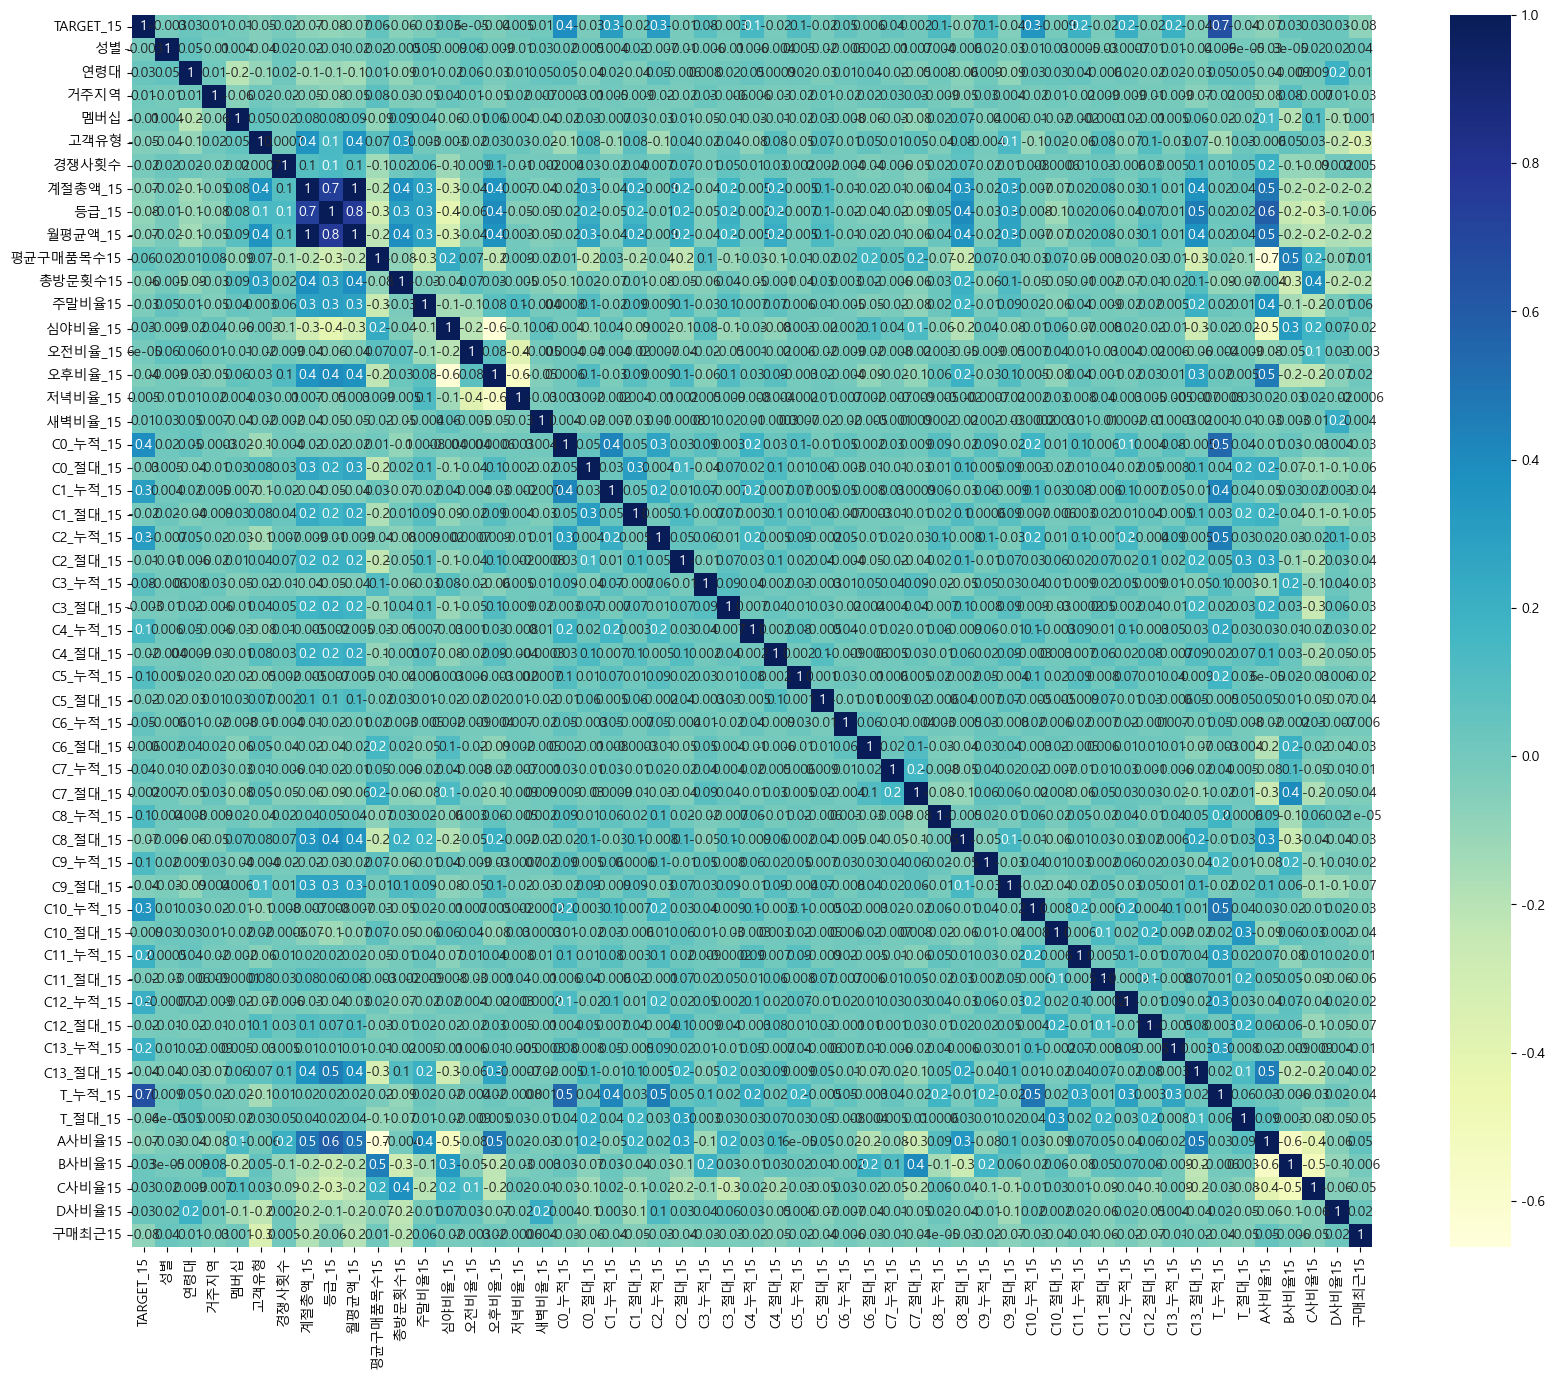

In [18]:
corr = df15.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='YlGnBu')
# corr.TARGET_15.sort_values(ascending=True)

In [19]:
# 1~5기 데이터
xtrain = df15.drop('TARGET_15',axis=1)
ytrain = df15['TARGET_15']

# 6기 데이터
xtest = df6.drop('TARGET_16',axis=1)
ytest = df6['TARGET_16']

# 계절총액, 등급, 월평균액 피처간 상관관계가 너무 높음 -> 중복 컬럼
xtrain = xtrain.drop(['계절총액_15','월평균액_15'], axis=1)
xtest = xtest.drop(['계절총액_26','월평균액_6'], axis=1)
# xtrain = xtrain.drop(['계절총액_15','등급_15'], axis=1)
# xtest = xtest.drop(['계절총액_26','등급_6'], axis=1)
# xtrain = xtrain.drop(['월평균액_15','등급_15'], axis=1)
# xtest = xtest.drop(['월평균액_ 6','등급_6'], axis=1)

In [20]:
df15 = df[['TARGET_15','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','계절총액_15','등급_15','월평균액_15','평균구매품목수15','총방문횟수15','주말비율15','심야비율_15','오전비율_15','오후비율_15','저녁비율_15','새벽비율_15','C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15','T_누적_15','T_절대_15','A사비율15','B사비율15','C사비율15','D사비율15','구매최근15']]
df6 = df[['TARGET_16','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','계절총액_26','등급_6','월평균액_6','평균구매품목수6','총방문횟수26','주말비율6','심야비율_6','오전비율_6','오후비율_6','저녁비율_6','새벽비율_6','C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26','T_누적_26','T_절대_26','A사비율26','B사비율26','C사비율26','D사비율26','구매최근6']]
df6.head(3)

,TARGET_16,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,계절총액_26,등급_6,월평균액_6,...,C12_절대_26,C13_누적_26,C13_절대_26,T_누적_26,T_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,구매최근6
0,1,1,0,8,1,1,0.375,0.839432,1.0,0.787242,...,4.0,0.0,30.0,0.0,2.0,0.80,0.07,0.13,0.00,0.043956
1,0,1,0,8,1,1,0.200,0.837795,1.0,0.791179,...,3.0,-6.0,10.0,0.0,6.0,0.96,0.02,0.00,0.02,0.076923
2,1,1,0,8,1,1,0.000,0.682797,0.0,0.623960,...,0.0,0.0,0.0,-1.0,1.0,0.00,0.00,1.00,0.00,0.021978


In [21]:
df26 = df[['TARGET_26','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_26','평균구매품목수26','총방문횟수26','주말비율26','심야비율_26','오전비율_26','오후비율_26','저녁비율_26','새벽비율_26','C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26','T_누적_26','T_절대_26','A사비율26','B사비율26','C사비율26','D사비율26','구매최근26']]
df7 = df[['TARGET_27','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_7','평균구매품목수7','총방문횟수37','주말비율7','심야비율_7','오전비율_7','오후비율_7','저녁비율_7','새벽비율_7','C0_누적_37','C0_절대_37','C1_누적_37','C1_절대_37','C2_누적_37','C2_절대_37','C3_누적_37','C3_절대_37','C4_누적_37','C4_절대_37','C5_누적_37','C5_절대_37','C6_누적_37','C6_절대_37','C7_누적_37','C7_절대_37','C8_누적_37','C8_절대_37','C9_누적_37','C9_절대_37','C10_누적_37','C10_절대_37','C11_누적_37','C11_절대_37','C12_누적_37','C12_절대_37','C13_누적_37','C13_절대_37','T_누적_37','T_절대_37','A사비율37','B사비율37','C사비율37','D사비율37','구매최근7']]

xtrain7 = df26.drop('TARGET_26',axis=1)
ytrain7 = df26['TARGET_26']
xtest7 = df7.drop('TARGET_27',axis=1)
ytest7 = df7['TARGET_27']

In [22]:
df37 = df[['TARGET_37','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_37','평균구매품목수37','총방문횟수37','주말비율37','심야비율_37','오전비율_37','오후비율_37','저녁비율_37','새벽비율_37','C0_누적_37','C0_절대_37','C1_누적_37','C1_절대_37','C2_누적_37','C2_절대_37','C3_누적_37','C3_절대_37','C4_누적_37','C4_절대_37','C5_누적_37','C5_절대_37','C6_누적_37','C6_절대_37','C7_누적_37','C7_절대_37','C8_누적_37','C8_절대_37','C9_누적_37','C9_절대_37','C10_누적_37','C10_절대_37','C11_누적_37','C11_절대_37','C12_누적_37','C12_절대_37','C13_누적_37','C13_절대_37','T_누적_37','T_절대_37','A사비율37','B사비율37','C사비율37','D사비율26','구매최근37']]
df8 = df[['TARGET_38','성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_8','평균구매품목수8','총방문횟수48','주말비율8','심야비율_8','오전비율_8','오후비율_8','저녁비율_8','새벽비율_8','C0_누적_48','C0_절대_48','C1_누적_48','C1_절대_48','C2_누적_48','C2_절대_48','C3_누적_48','C3_절대_48','C4_누적_48','C4_절대_48','C5_누적_48','C5_절대_48','C6_누적_48','C6_절대_48','C7_누적_48','C7_절대_48','C8_누적_48','C8_절대_48','C9_누적_48','C9_절대_48','C10_누적_48','C10_절대_48','C11_누적_48','C11_절대_48','C12_누적_48','C12_절대_48','C13_누적_48','C13_절대_48','T_누적_48','T_절대_48','A사비율48','B사비율48','C사비율48','D사비율48','구매최근8']]

xtrain8 = df37.drop('TARGET_37',axis=1)
ytrain8 = df37['TARGET_37']
xtest8 = df8.drop('TARGET_38',axis=1)
ytest8 = df8['TARGET_38']

In [23]:
# 평가지표 뽑기
def get_clf_eval(ytest, pred=None, pred_proba=None):
    confusion = confusion_matrix( ytest, pred)
    accuracy = accuracy_score(ytest , pred)
    precision = precision_score(ytest , pred)
    recall = recall_score(ytest , pred)
    f1 = f1_score(ytest,pred)
    roc_auc = roc_auc_score(ytest, pred_proba)
    
    print(f'''오차 행렬: 
{confusion}

정확도: {accuracy:.4f}
정밀도: {precision:.4f}
재현율: {recall:.4f}
F1: {f1:.4f}
AUC: {roc_auc:.4f}''')

In [24]:
# 피처 중요도 그래프 그리기
def grap(importance, xtrain):
    col = pd.Series(importance, index=xtrain.columns)
    fi = col.sort_values(ascending=False)    #fi.index하면 칼럼 리스트 뽑을 수 있음

    plt.figure(figsize=(16,14))
    sns.barplot(x=fi, y=fi.index, palette="pastel")
    plt.show()
    return fi

In [25]:
# 그리드서치CV
def gridcv(model, params):
    gdt = GridSearchCV(model, param_grid=params, scoring='accuracy', n_jobs=-1)
    gdt.fit(xtrain, ytrain)

    print('GridSearchCV 최적 파라미터:', gdt.best_params_)
    print('GridSearchCV 최고 정확도:', gdt.best_score_)

    scores_df = pd.DataFrame(gdt.cv_results_)
    s_df = scores_df[['params', 'mean_test_score', 'rank_test_score']]
    s_df = s_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)
    return s_df

#### DecisionTreeClassifier

In [26]:
from sklearn.metrics import classification_report, accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(xtrain, ytrain)

preds = dt_clf.predict(xtest)
pred_proba = dt_clf.predict_proba(xtest)[:, 1]

In [27]:
# 1~6분기
get_clf_eval(ytest, preds, pred_proba)

오차 행렬: 
[[3996 2830]
 [2585 9972]]

정확도: 0.7206
정밀도: 0.7789
재현율: 0.7941
F1: 0.7865
AUC: 0.6898


In [28]:
# 2~7분기
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(xtrain7, ytrain7)

preds = dt_clf.predict(xtest7)
pred_proba = dt_clf.predict_proba(xtest7)[:, 1]

get_clf_eval(ytest7, preds, pred_proba)

오차 행렬: 
[[4592 2745]
 [2698 9348]]

정확도: 0.7192
정밀도: 0.7730
재현율: 0.7760
F1: 0.7745
AUC: 0.7009


In [29]:
# xtrainA = df[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수']]
# ytrainA = df['TARGET_26']
# xtestA = df[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수']]
# ytestA = df['TARGET_37']

# # 어떤 칼럼이 영향이 있는지 테스트중~~~~~~~~
# dt_clf = DecisionTreeClassifier(random_state=156)
# dt_clf.fit(xtrainA, ytrainA)

# preds = dt_clf.predict(xtestA)
# pred_proba = dt_clf.predict_proba(xtestA)[:, 1]

# get_clf_eval(ytestA, preds, pred_proba)

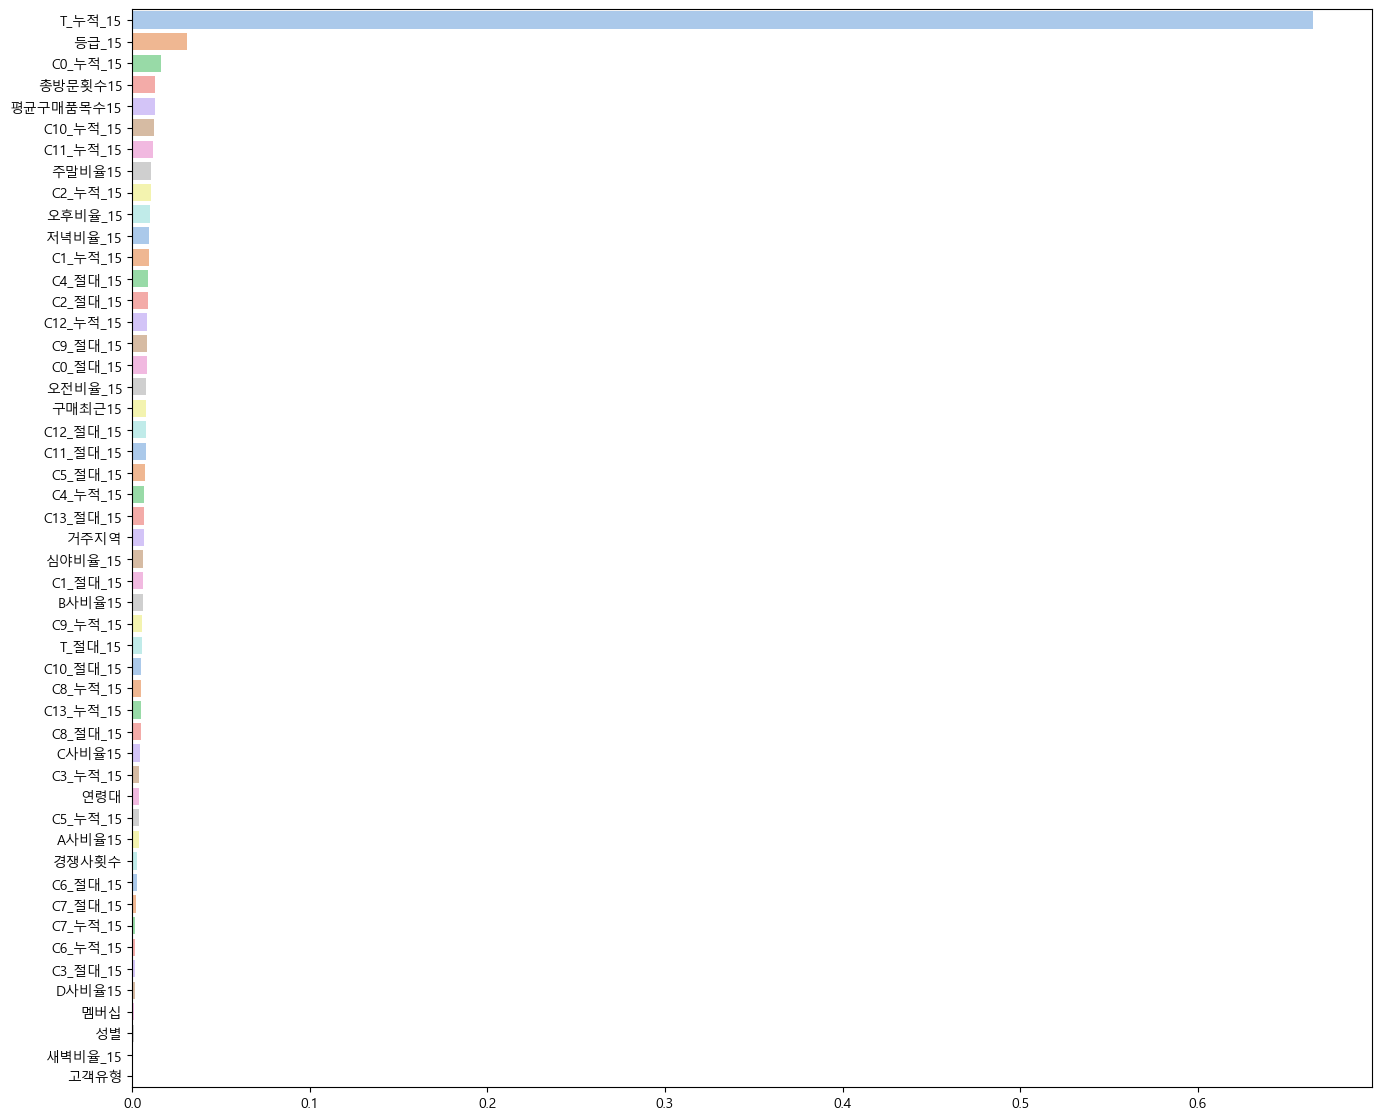

In [30]:
importance = dt_clf.feature_importances_
dt_fi = grap(importance, xtrain)

In [31]:
# 하이퍼 파라미터 조정
dtree = DecisionTreeClassifier(random_state=156)
params = {'max_depth' : [2,4,6,10],
          'min_samples_split' : [30,35,40,45,50],
          'min_samples_leaf' : [1,2,4,7,10,15,20], 
          'max_leaf_nodes' : [2,5,10,15,20,25]
         }

s_df = gridcv(dtree, params)
s_df.head(3)

TypeError: __init__() got an unexpected keyword argument 'scoring'

In [32]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=10, 
                                max_leaf_nodes=20, min_samples_leaf=10, 
                               min_samples_split=40)
dt_clf.fit(xtrain, ytrain)

preds = dt_clf.predict(xtest)
pred_proba = dt_clf.predict_proba(xtest)[:, 1]

get_clf_eval(ytest, preds, pred_proba)

오차 행렬: 
[[ 4134  2692]
 [ 2410 10147]]

정확도: 0.7368
정밀도: 0.7903
재현율: 0.8081
F1: 0.7991
AUC: 0.7765


#### LGBMClassifier

In [33]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.05)

evals = [(xtrain, ytrain), (xtest, ytest)]
lgbm.fit(xtrain, ytrain, early_stopping_rounds=1000, eval_metric="logloss", eval_set=evals, verbose=True)

preds = lgbm.predict(xtest)
pred_proba = lgbm.predict_proba(xtest)[:, 1]

[1]	training's binary_logloss: 0.612657	valid_1's binary_logloss: 0.630562
[2]	training's binary_logloss: 0.581517	valid_1's binary_logloss: 0.615007
[3]	training's binary_logloss: 0.55356	valid_1's binary_logloss: 0.601752
[4]	training's binary_logloss: 0.528097	valid_1's binary_logloss: 0.590367
[5]	training's binary_logloss: 0.504937	valid_1's binary_logloss: 0.58047
[6]	training's binary_logloss: 0.483841	valid_1's binary_logloss: 0.572015
[7]	training's binary_logloss: 0.464459	valid_1's binary_logloss: 0.564823
[8]	training's binary_logloss: 0.446655	valid_1's binary_logloss: 0.558659
[9]	training's binary_logloss: 0.430211	valid_1's binary_logloss: 0.553388
[10]	training's binary_logloss: 0.415014	valid_1's binary_logloss: 0.549041
[11]	training's binary_logloss: 0.400933	valid_1's binary_logloss: 0.545571
[12]	training's binary_logloss: 0.387851	valid_1's binary_logloss: 0.542509
[13]	training's binary_logloss: 0.375634	valid_1's binary_logloss: 0.540313
[14]	training's binary_

In [34]:
from sklearn.metrics import log_loss

# 1~6분기
get_clf_eval(ytest, preds, pred_proba)

logloss = log_loss(ytest, pred_proba)
print(f'\n로그손실: {logloss}')     #낮을수록 좋음

오차 행렬: 
[[ 3679  3147]
 [ 1765 10792]]

정확도: 0.7466
정밀도: 0.7742
재현율: 0.8594
F1: 0.8146
AUC: 0.7786

로그손실: 0.5383535994644033


In [35]:
# 2~7분기
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.05)

evals = [(xtrain7, ytrain7), (xtest7, ytest7)]
lgbm.fit(xtrain7, ytrain7, early_stopping_rounds=1000, eval_metric="logloss", eval_set=evals, verbose=False)

preds2 = lgbm.predict(xtest7)
pred_proba = lgbm.predict_proba(xtest7)[:, 1]

get_clf_eval(ytest7, preds2, pred_proba)
logloss = log_loss(ytest7, pred_proba)
print(f'\n로그손실: {logloss}')

df['pred_27'] = preds2

오차 행렬: 
[[ 4374  2963]
 [ 1975 10071]]

정확도: 0.7452
정밀도: 0.7727
재현율: 0.8360
F1: 0.8031
AUC: 0.7866

로그손실: 0.539745135637537


In [36]:
# 3~8기
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.05)

evals = [(xtrain8, ytrain8), (xtest8, ytest8)]
lgbm.fit(xtrain8, ytrain8, early_stopping_rounds=1000, eval_metric="logloss", eval_set=evals, verbose=False)

preds3 = lgbm.predict(xtest8)
pred_proba = lgbm.predict_proba(xtest8)[:, 1]

get_clf_eval(ytest8, preds3, pred_proba)
logloss = log_loss(ytest8, pred_proba)
print(f'\n로그손실: {logloss}')

df['pred_38'] = preds3

오차 행렬: 
[[4668 3084]
 [1943 9688]]

정확도: 0.7406
정밀도: 0.7585
재현율: 0.8329
F1: 0.7940
AUC: 0.7745

로그손실: 0.5622468429900138


In [37]:
print(df[df['pred_27']==0].pred_27.count())
print(df[df['pred_38']==0].pred_38.count())

6349
6611


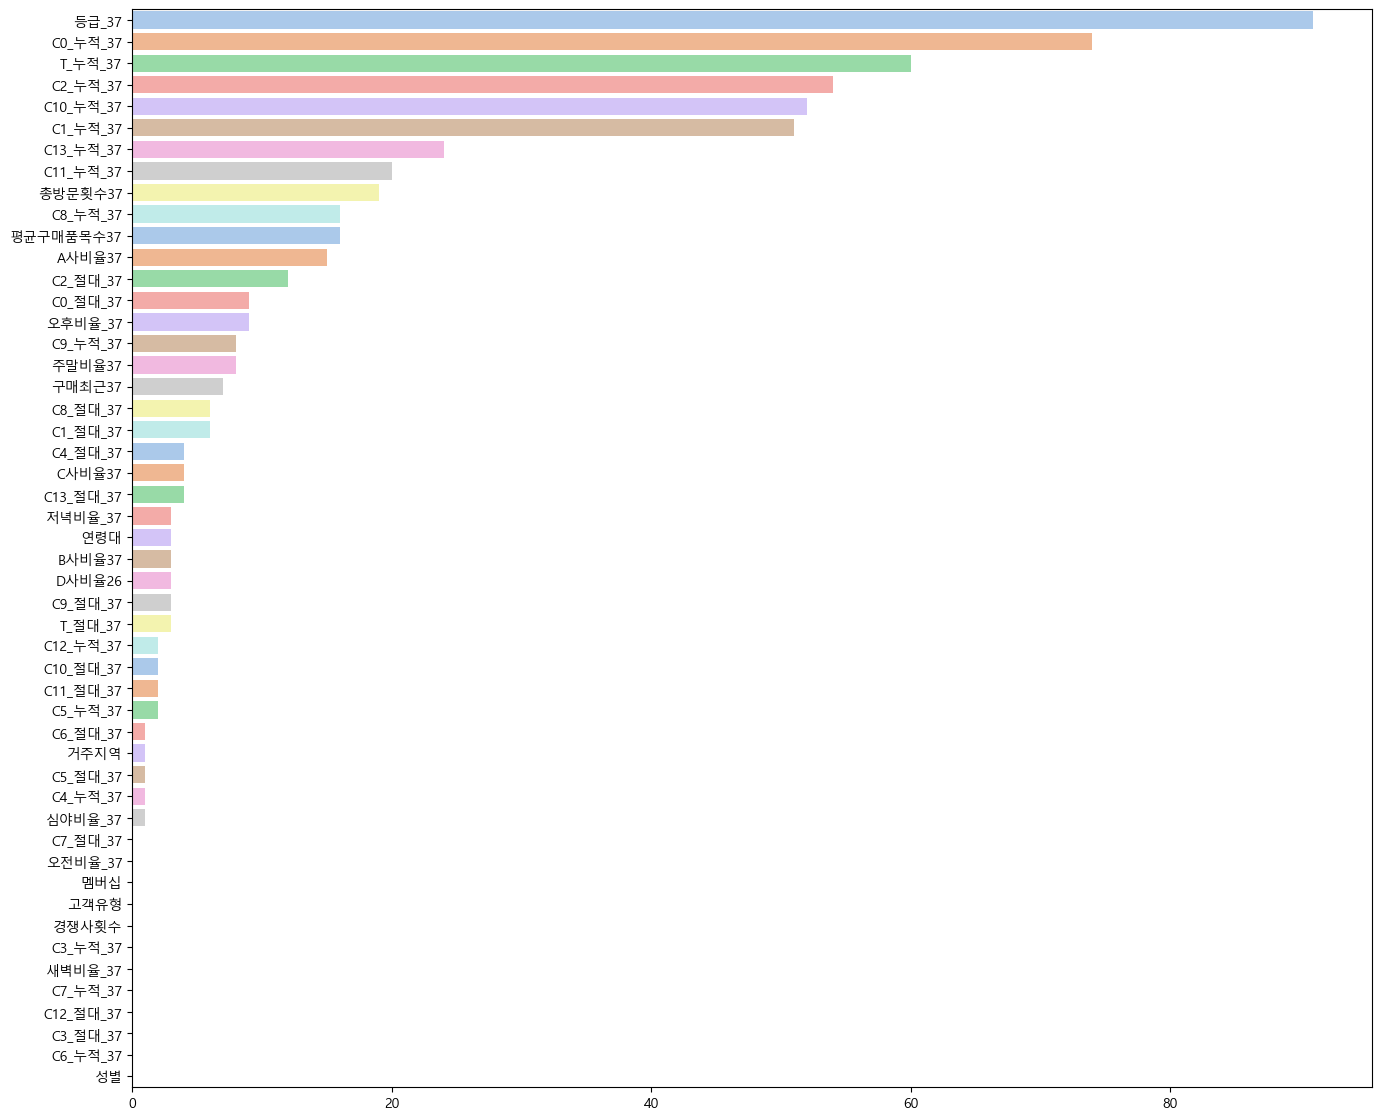

In [38]:
importance = lgbm.feature_importances_
lgbm_fi = grap(importance, xtrain8)

In [39]:
# 하이퍼파라미터 조정
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.05)
params = {'max_depth' : [2,4,6,10],
          'min_samples_split' : [30,35,40,45,50],
          'min_samples_leaf' : [1,2,4,7,10,15,20],
         'max_features':[0.1, 0.3, 0.5, 0.7, 1]}

s_df = gridcv(lgbm, params)

TypeError: __init__() got an unexpected keyword argument 'scoring'

In [40]:
# print(s_df.params[0], s_df.rank_test_score[0])
# print(s_df.params[1], s_df.rank_test_score[1])
# print(s_df.params[2], s_df.rank_test_score[2])
# print(s_df.params[3], s_df.rank_test_score[3])
# print(s_df.params[4], s_df.rank_test_score[4])
s_df.head(3)

NameError: name 's_df' is not defined

In [41]:
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.05,
                      max_depth=10, min_samples_split=35,
                      min_samples_leaf=15, max_features=0.7)
evals = [(xtrain, ytrain), (xtest, ytest)]
lgbm.fit(xtrain, ytrain, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=False)

preds = lgbm.predict(xtest)
pred_proba = lgbm.predict_proba(xtest)[:, 1]

get_clf_eval(ytest, preds, pred_proba)
logloss = log_loss(ytest, pred_proba)
print(f'\n로그손실: {logloss}')

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features
오차 행렬: 
[[ 3691  3135]
 [ 1768 10789]]

정확도: 0.7470
정밀도: 0.7748
재현율: 0.8592
F1: 0.8148
AUC: 0.7787

로그손실: 0.538120192934795


#### RandomForestClassifier

In [42]:
new_rf = RandomForestClassifier(n_estimators=20, random_state=156, n_jobs=-1)
new_rf.fit(xtrain, ytrain)

preds = new_rf.predict(xtest)
pred_proba = new_rf.predict_proba(xtest)[:, 1]

In [43]:
# 1~6분기
get_clf_eval(ytest, preds, pred_proba)

오차 행렬: 
[[ 4180  2646]
 [ 2351 10206]]

정확도: 0.7422
정밀도: 0.7941
재현율: 0.8128
F1: 0.8033
AUC: 0.7713


In [44]:
# 2~7분기
new_rf = RandomForestClassifier(n_estimators=20, random_state=156, n_jobs=-1)
new_rf.fit(xtrain7, ytrain7)

preds = new_rf.predict(xtest7)
pred_proba = new_rf.predict_proba(xtest7)[:, 1]

get_clf_eval(ytest7, preds, pred_proba)

오차 행렬: 
[[4626 2711]
 [2329 9717]]

정확도: 0.7400
정밀도: 0.7819
재현율: 0.8067
F1: 0.7941
AUC: 0.7867


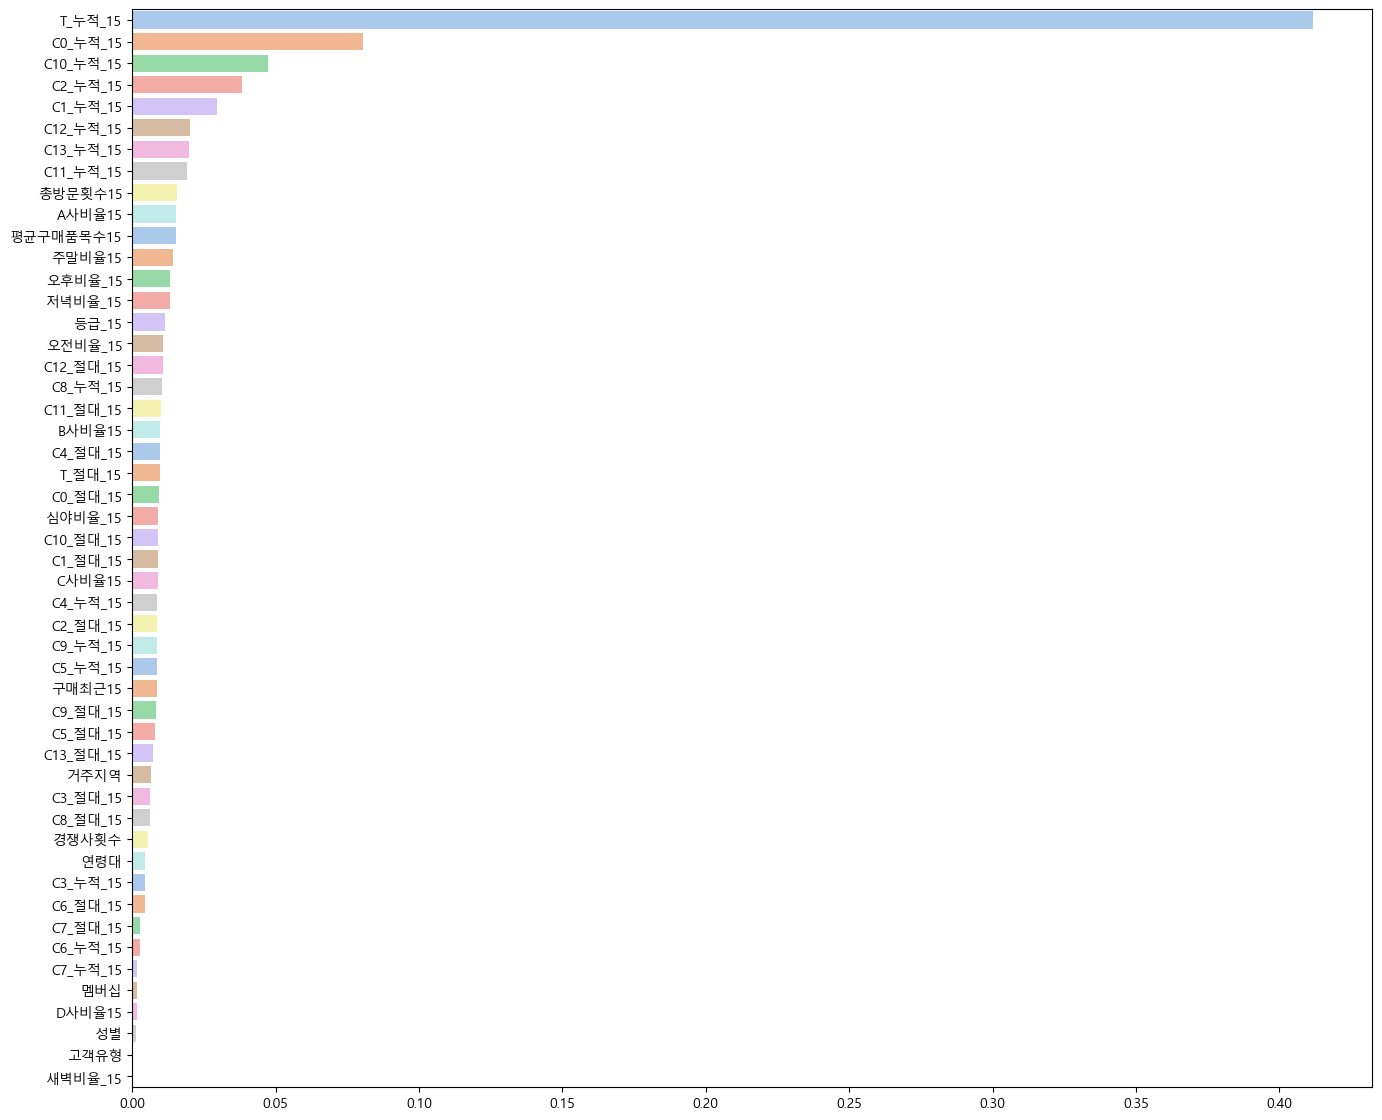

In [45]:
importance = new_rf.feature_importances_
rf_fi = grap(importance, xtrain)

#### XGBClassifier

In [46]:
columns_tr = xtrain.columns   #원본 칼럼명
columns_val = xtest.columns

col = [str(i) for i in range(0,len(columns_tr))]
xtrain.columns=col
xtest.columns=col

In [47]:
xgb = XGBClassifier(n_estimators=20, learning_rate=0.05, random_state=156)
xgb.fit(xtrain, ytrain, early_stopping_rounds=1000,
       eval_metric='auc', eval_set=[(xtrain, ytrain), (xtest, ytest)])

[0]	validation_0-auc:0.97082	validation_1-auc:0.77622
[1]	validation_0-auc:0.97093	validation_1-auc:0.77619
[2]	validation_0-auc:0.97131	validation_1-auc:0.77652
[3]	validation_0-auc:0.97190	validation_1-auc:0.77676
[4]	validation_0-auc:0.97246	validation_1-auc:0.77720
[5]	validation_0-auc:0.97263	validation_1-auc:0.77727
[6]	validation_0-auc:0.97324	validation_1-auc:0.77743
[7]	validation_0-auc:0.97346	validation_1-auc:0.77759
[8]	validation_0-auc:0.97395	validation_1-auc:0.77846
[9]	validation_0-auc:0.97410	validation_1-auc:0.77842
[10]	validation_0-auc:0.97421	validation_1-auc:0.77853
[11]	validation_0-auc:0.97433	validation_1-auc:0.77855
[12]	validation_0-auc:0.97456	validation_1-auc:0.77890
[13]	validation_0-auc:0.97460	validation_1-auc:0.77905
[14]	validation_0-auc:0.97473	validation_1-auc:0.77906
[15]	validation_0-auc:0.97479	validation_1-auc:0.77915
[16]	validation_0-auc:0.97493	validation_1-auc:0.77914
[17]	validation_0-auc:0.97499	validation_1-auc:0.77917
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, ...)

In [48]:
# 1~6분기
preds = xgb.predict(xtest)
pred_proba = xgb.predict_proba(xtest)[:, 1]
get_clf_eval(ytest, preds, pred_proba)

오차 행렬: 
[[ 3939  2887]
 [ 2061 10496]]

정확도: 0.7447
정밀도: 0.7843
재현율: 0.8359
F1: 0.8093
AUC: 0.7792


In [49]:
# 2~7분기
columns_tr7 = xtrain7.columns   #원본 칼럼명
columns_val7 = xtest7.columns
col = [str(i) for i in range(0,len(columns_tr))]
xtrain7.columns=col
xtest7.columns=col

xgb = XGBClassifier(n_estimators=20, learning_rate=0.05, random_state=156)
xgb.fit(xtrain7, ytrain7, early_stopping_rounds=100,
       eval_metric='auc', eval_set=[(xtrain7, ytrain7), (xtest7, ytest7)], verbose=False)

preds = xgb.predict(xtest7)
pred_proba = xgb.predict_proba(xtest7)[:, 1]
get_clf_eval(ytest7, preds, pred_proba)

xtrain7.columns = columns_tr7   #칼럼명 다시 원래대로
xtest7.columns = columns_val7

오차 행렬: 
[[4506 2831]
 [2184 9862]]

정확도: 0.7413
정밀도: 0.7770
재현율: 0.8187
F1: 0.7973
AUC: 0.7865


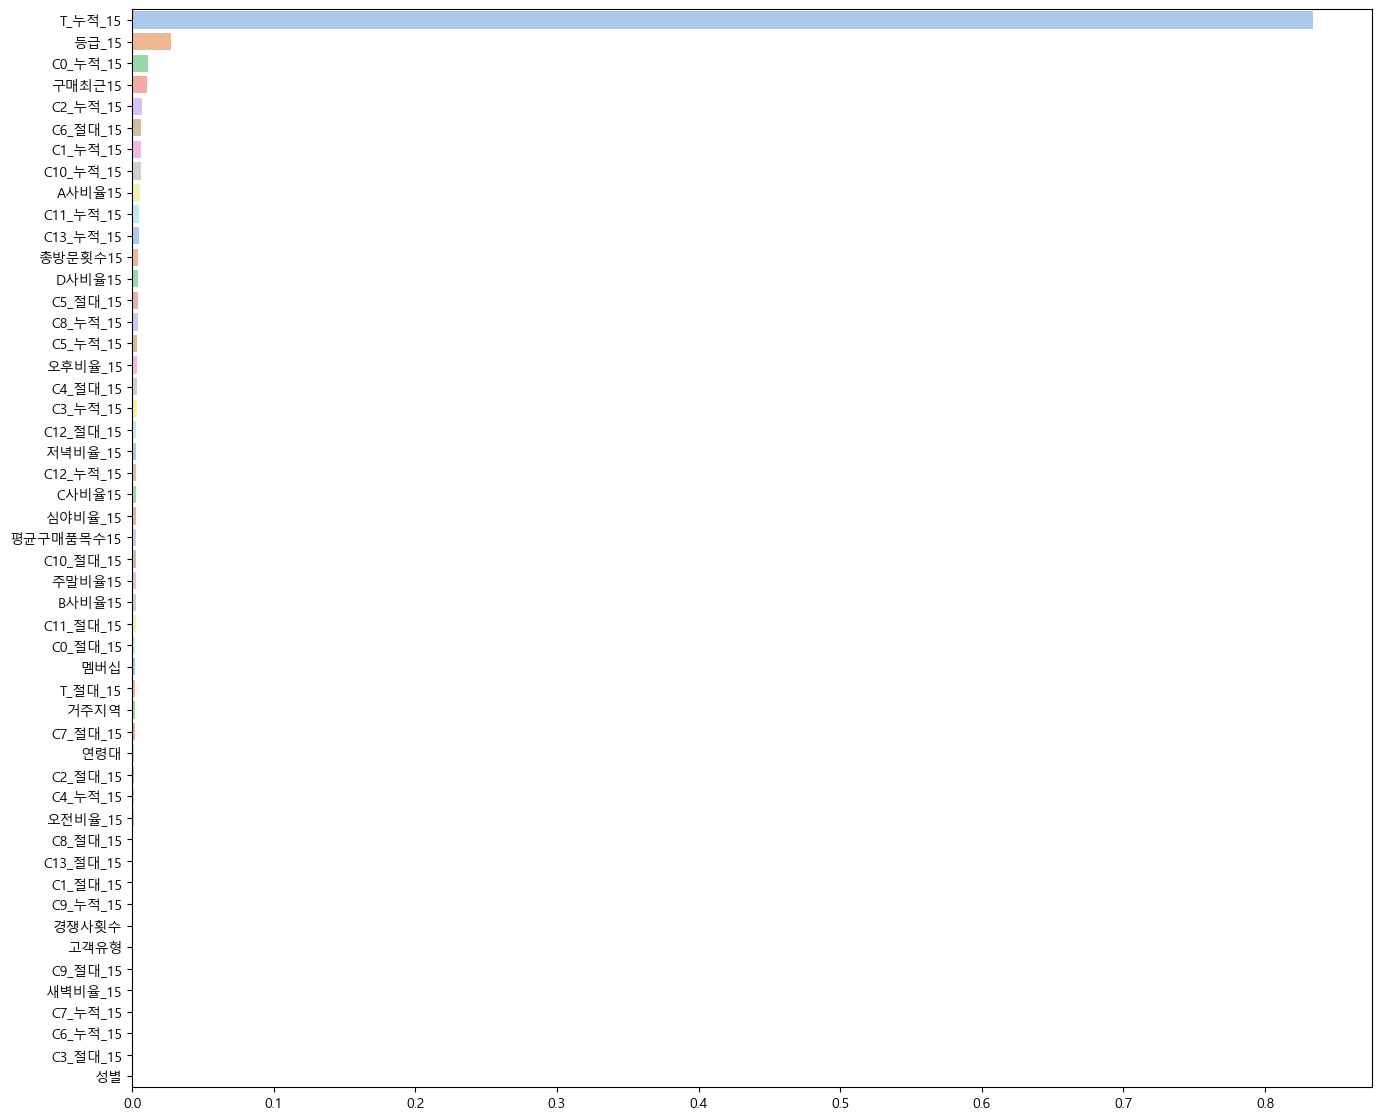

In [50]:
xtrain.columns = columns_tr   #칼럼명 다시 원래대로
xtest.columns = columns_val

importance = xgb.feature_importances_
xgb_fi = grap(importance, xtrain)

## 군집화

In [51]:
idx38 = df[df.pred_38==0].index

In [52]:
### 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    cl=[]
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i    
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        cl.append(cluster_labels)
        
def visualize_kmeans_plot_multi(cluster_lists, X_features): 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)  
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels     
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','o','o','o','o','o']     
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend, alpha=0.3)
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    plt.show()

In [53]:
lgbm_fi.index[:10]

Index(['등급_37', 'C0_누적_37', 'T_누적_37', 'C2_누적_37', 'C10_누적_37', 'C1_누적_37',
       'C13_누적_37', 'C11_누적_37', '총방문횟수37', 'C8_누적_37'],
      dtype='object')

In [54]:
cust = df[lgbm_fi.index[:10]].iloc[idx38]    # lgbm 피처 임포턴스

nc = 4    #군집 클러스터 개수
kmeans = KMeans(n_clusters=nc, init='k-means++',max_iter=100, random_state=156)
kmeans.fit(cust)
cust['cluster'] = kmeans.labels_
cust.head(3)

,등급_37,C0_누적_37,T_누적_37,C2_누적_37,C10_누적_37,C1_누적_37,C13_누적_37,C11_누적_37,총방문횟수37,C8_누적_37,cluster
0,1.0,-3.0,0.0,-9.0,0.0,-4.0,0.0,7.0,0.301213,2.0,3
3,0.5,1.0,0.0,-5.0,0.0,2.0,7.0,-2.0,0.202936,0.0,0
12,0.5,1.0,1.0,-4.0,4.0,0.0,0.0,0.0,0.287173,0.0,3


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # n_components: 주성분 개수(n차원으로 압축)
pca_transformed = pca.fit_transform(cust.drop('cluster',axis=1))

cust['pca_x'] = pca_transformed[:,0]
cust['pca_y'] = pca_transformed[:,1]
cust.head(3)

,등급_37,C0_누적_37,T_누적_37,C2_누적_37,C10_누적_37,C1_누적_37,C13_누적_37,C11_누적_37,총방문횟수37,C8_누적_37,cluster,pca_x,pca_y
0,1.0,-3.0,0.0,-9.0,0.0,-4.0,0.0,7.0,0.301213,2.0,3,-1.049884,1.189316
3,0.5,1.0,0.0,-5.0,0.0,2.0,7.0,-2.0,0.202936,0.0,0,-3.818295,-3.407636
12,0.5,1.0,1.0,-4.0,4.0,0.0,0.0,0.0,0.287173,0.0,3,-1.511986,-0.094800


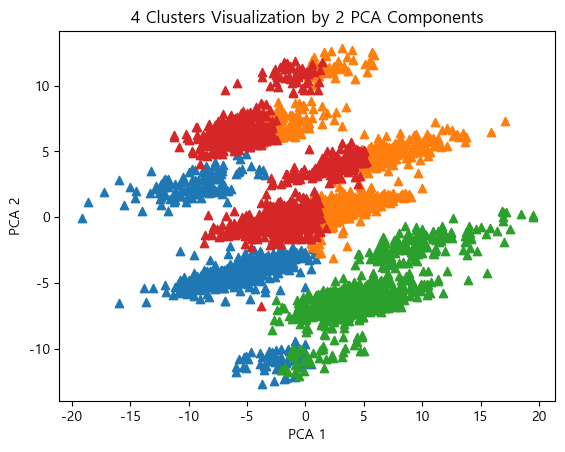

In [56]:
# 그래프 그리기
for i in range(nc):   # nc=군집 클러스터 개수
    mark_idx = cust[cust['cluster']==i].index
    plt.scatter(x=cust.loc[mark_idx, 'pca_x'], y=cust.loc[mark_idx, 'pca_y'], marker='^')

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title(f'{nc} Clusters Visualization by 2 PCA Components')
plt.show()

In [57]:
# 실루엣 계수: 클러스터 내 유사도가 높고, 타 클러스터와 확실히 구분되는지
sil_score = silhouette_samples(cust.drop(['cluster','pca_x','pca_y'],axis=1), cust['cluster'])
cust['silhouette'] = sil_score

print(f'군집(클러스터) 수: {nc}')
print(f'실루엣 계수 평균: {cust.silhouette.mean()}')
for i in range(nc):
    print(f'{i}번 클러스터 실루엣 계수 평균: {cust.silhouette[cust.cluster==i].mean()}')

군집(클러스터) 수: 4
실루엣 계수 평균: 0.17475693157978667
0번 클러스터 실루엣 계수 평균: 0.19351826207441924
1번 클러스터 실루엣 계수 평균: 0.11305130958313972
2번 클러스터 실루엣 계수 평균: 0.19334871283504945
3번 클러스터 실루엣 계수 평균: 0.20682169120703525


In [58]:
num = 10
fi1 = dt_fi.index[:num]
fi2 = lgbm_fi.index[:num]
fi3 = xgb_fi.index[:num]
fi4 = rf_fi.index[:num]
# fi1, fi2, fi3, fi4 

In [59]:
# 모든 모델에서 중요도 top10 안에 드는 피처
fi0=[]
for i in fi1:
    if i in fi2 and i in fi3 and i in fi4:
        fi0.append(i)
        
print(fi0,'\n')
print(fi1[:1], fi2[:1], fi3[:1], fi4[:1])
# 각 모델별 top1 피처

[] 

Index(['T_누적_15'], dtype='object') Index(['등급_37'], dtype='object') Index(['T_누적_15'], dtype='object') Index(['T_누적_15'], dtype='object')


In [60]:
# 중요도 top피처 각 모델별로 합친 후 중복 제거
fi1 = fi1.append(fi2)
fi1 = fi1.append(fi3)
fi1 = fi1.append(fi4)
f = fi1.unique()
f, len(f)

(Index(['T_누적_15', '등급_15', 'C0_누적_15', '총방문횟수15', '평균구매품목수15', 'C10_누적_15',
        'C11_누적_15', '주말비율15', 'C2_누적_15', '오후비율_15', '등급_37', 'C0_누적_37',
        'T_누적_37', 'C2_누적_37', 'C10_누적_37', 'C1_누적_37', 'C13_누적_37',
        'C11_누적_37', '총방문횟수37', 'C8_누적_37', '구매최근15', 'C6_절대_15', 'C1_누적_15',
        'A사비율15', 'C12_누적_15', 'C13_누적_15'],
       dtype='object'),
 26)

In [ ]:
xtrain.columns

In [ ]:
print(lgbm_fi[:10].index)

In [ ]:
df.head()
xtrain8.columns

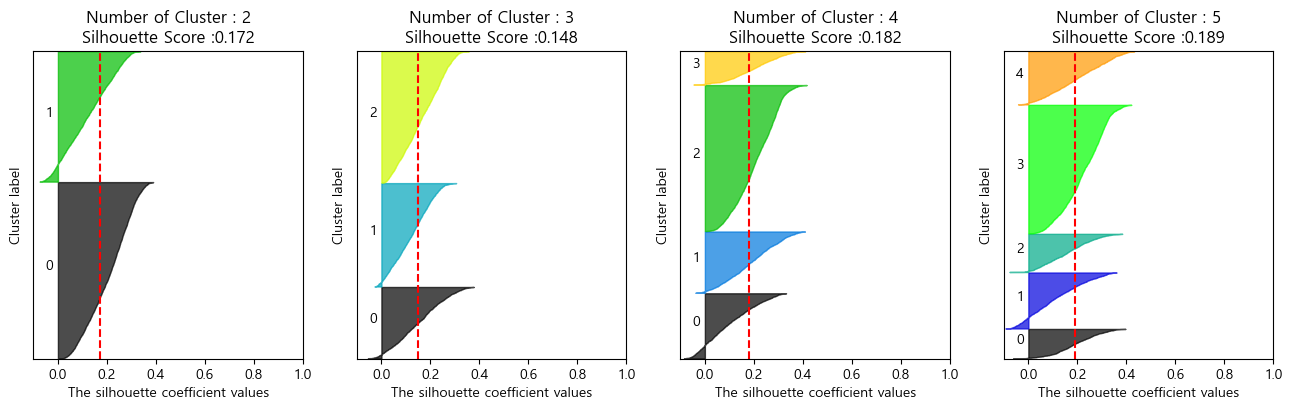

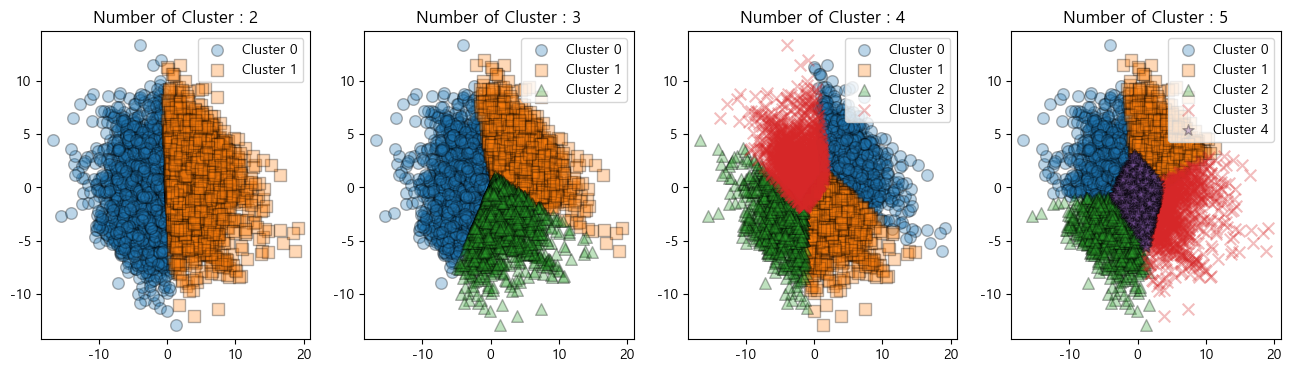

In [61]:
## 이거뤼~~~~
f5 = ['등급_37', 'T_누적_37' ,'C10_누적_37', 'C1_누적_37','C0_누적_37','C2_누적_37', 'C11_누적_37','C5_누적_37',
      '총방문횟수37','평균구매품목수37', '주말비율37','구매최근37', 
       'A사비율37', 'B사비율37', 'C사비율37','D사비율37']

cust = df[f5].iloc[idx38]
visualize_silhouette([2,3,4,5], cust)
visualize_kmeans_plot_multi([2,3,4,5], cust)

In [51]:
f5 = ['등급_37', 'T_누적_37' ,'C10_누적_37', 'C1_누적_37','C0_누적_37','C2_누적_37', 'C11_누적_37','C5_누적_37',
      '총방문횟수37','평균구매품목수37', '주말비율37','구매최근37', 
       'A사비율37', 'B사비율37', 'C사비율37','D사비율37']
len(f5)

16

In [74]:
# 클러스터 넣기
f5 = ['등급_37', 'T_누적_37' ,'C10_누적_37', 'C1_누적_37','C0_누적_37','C2_누적_37', 'C11_누적_37','C5_누적_37',
      '총방문횟수37','평균구매품목수37', '주말비율37','구매최근37', 
       'A사비율37', 'B사비율37', 'C사비율37','D사비율37']
cust = df[f5].iloc[idx38]

nc = 3    #군집 클러스터 개수
kmeans = KMeans(n_clusters=nc, init='k-means++',max_iter=100, random_state=156)
kmeans.fit(cust)
cust['cluster'] = kmeans.labels_
cust.head(3)

,등급_37,T_누적_37,C10_누적_37,C1_누적_37,C0_누적_37,C2_누적_37,C11_누적_37,C5_누적_37,총방문횟수37,평균구매품목수37,주말비율37,구매최근37,A사비율37,B사비율37,C사비율37,D사비율37,cluster
0,1.0,0.0,0.0,-4.0,-3.0,-9.0,7.0,0.0,0.301213,0.109179,0.30,0.014151,0.79,0.08,0.13,0.0,2
3,0.5,0.0,0.0,2.0,1.0,-5.0,-2.0,0.0,0.202936,0.121001,0.19,0.001572,0.67,0.18,0.14,0.0,1
12,0.5,1.0,4.0,0.0,1.0,-4.0,0.0,0.0,0.287173,0.303894,0.38,0.001572,0.12,0.81,0.07,0.0,0


In [81]:
cluster_mean = cust.groupby('cluster').mean()



            등급_37   T_누적_37  C10_누적_37  C1_누적_37  C0_누적_37  C2_누적_37  \
cluster                                                                
0        0.553904  0.618361   0.394302  0.475202  0.756243  0.500879   
1        0.485065 -1.565584  -1.024675 -0.768831 -1.180519 -1.008442   
2        0.514363 -1.644973  -0.829443 -1.532316 -2.141382 -1.428636   

         C11_누적_37  C5_누적_37   총방문횟수37  평균구매품목수37    주말비율37    구매최근37  \
cluster                                                                 
0         1.162504  1.239887  0.242355   0.178888  0.301787  0.005311   
1        -5.212338 -0.769481  0.228099   0.187384  0.289052  0.009537   
2         0.833034 -1.706014  0.237664   0.180582  0.297289  0.008478   

           A사비율37    B사비율37    C사비율37    D사비율37  
cluster                                          
0        0.346525  0.427436  0.212747  0.012965  
1        0.297208  0.489831  0.203032  0.009344  
2        0.340588  0.393146  0.259506  0.006243  


In [82]:
cluster_mean.head()

,등급_37,T_누적_37,C10_누적_37,C1_누적_37,C0_누적_37,C2_누적_37,C11_누적_37,C5_누적_37,총방문횟수37,평균구매품목수37,주말비율37,구매최근37,A사비율37,B사비율37,C사비율37,D사비율37
cluster,,,,,,,,,,,,,,,,
0,0.553904,0.618361,0.394302,0.475202,0.756243,0.500879,1.162504,1.239887,0.242355,0.178888,0.301787,0.005311,0.346525,0.427436,0.212747,0.012965
1,0.485065,-1.565584,-1.024675,-0.768831,-1.180519,-1.008442,-5.212338,-0.769481,0.228099,0.187384,0.289052,0.009537,0.297208,0.489831,0.203032,0.009344
2,0.514363,-1.644973,-0.829443,-1.532316,-2.141382,-1.428636,0.833034,-1.706014,0.237664,0.180582,0.297289,0.008478,0.340588,0.393146,0.259506,0.006243


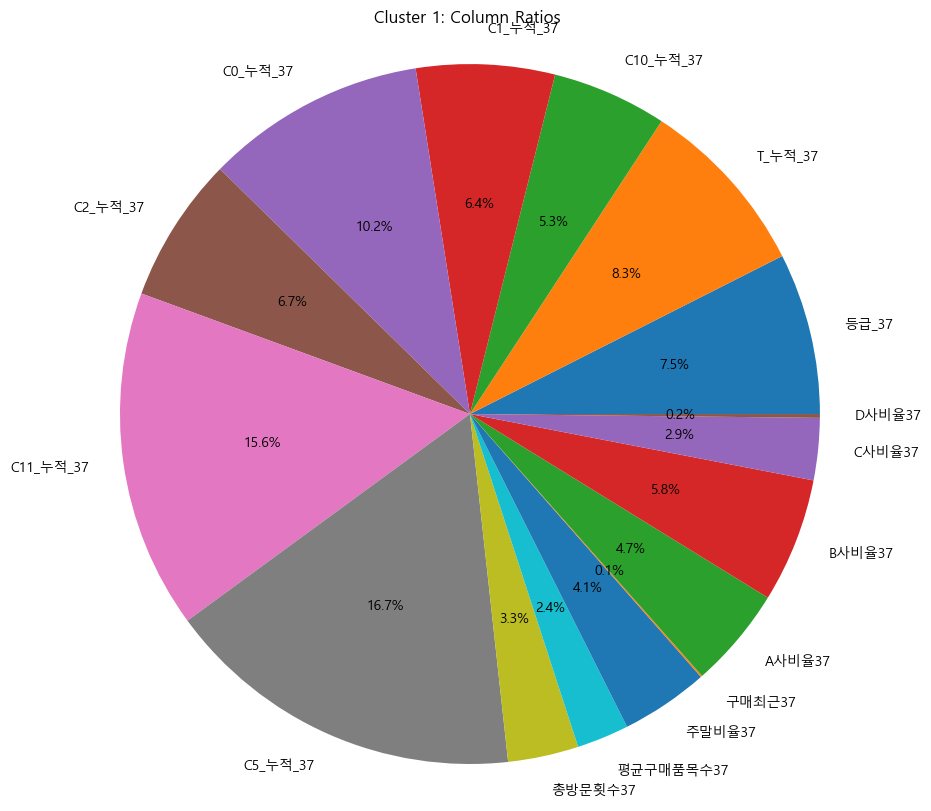

In [64]:
# 파이그래프
cluster_1_data = cust[cust['cluster'] == 0]
column_ratios = {}

# 각 컬럼의 값에 대한 비율 계산
for column in f5:
    column_ratios[column] = max(0, cluster_1_data[column].sum()) / cluster_1_data.shape[0]

plt.figure(figsize=(10, 10))
plt.pie(column_ratios.values(), labels=column_ratios.keys(), autopct='%1.1f%%')
plt.title("Cluster 1: Column Ratios"); plt.axis('equal'); plt.show()

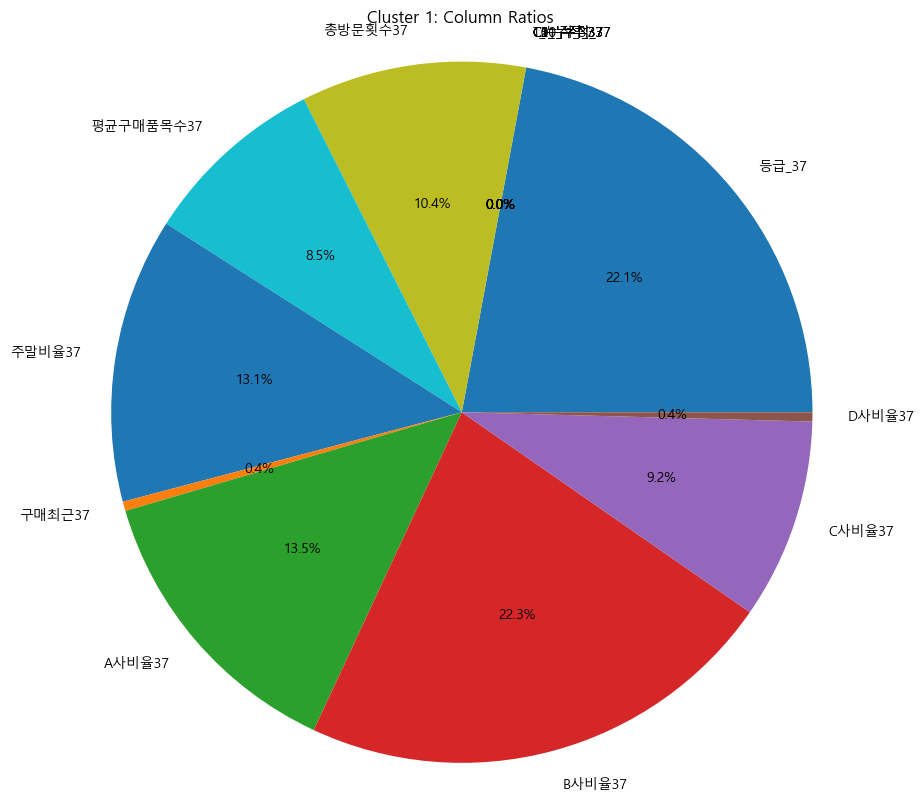

In [65]:
# 파이그래프
cluster_1_data = cust[cust['cluster'] == 1]
column_ratios = {}

# 각 컬럼의 값에 대한 비율 계산
for column in f5:
    column_ratios[column] = max(0, cluster_1_data[column].sum()) / cluster_1_data.shape[0]

plt.figure(figsize=(10, 10))
plt.pie(column_ratios.values(), labels=column_ratios.keys(), autopct='%1.1f%%')
plt.title("Cluster 1: Column Ratios"); plt.axis('equal'); plt.show()

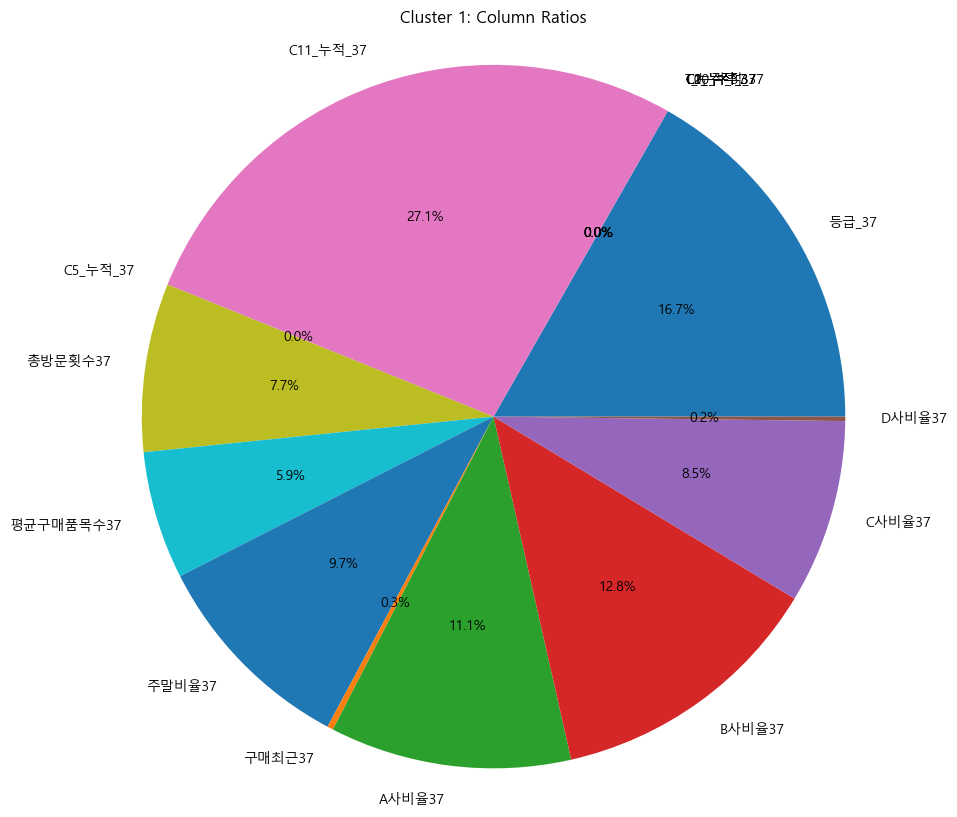

In [66]:
# 파이그래프
cluster_1_data = cust[cust['cluster'] == 2]
column_ratios = {}

# 각 컬럼의 값에 대한 비율 계산
for column in f5:
    column_ratios[column] = max(0, cluster_1_data[column].sum()) / cluster_1_data.shape[0]

plt.figure(figsize=(10, 10))
plt.pie(column_ratios.values(), labels=column_ratios.keys(), autopct='%1.1f%%')
plt.title("Cluster 1: Column Ratios"); plt.axis('equal'); plt.show()

In [ ]:
cust.head()

In [ ]:
cust['고객번호'] = df.iloc[idx38].고객번호

In [ ]:
cust.to_excel(r'D:\hmkd1\m1_programming\프젝 sql\cust.xlsx')

In [ ]:
cust[cust.cluster==2]   #군집 2번인 고객들만

In [ ]:
cust.groupby('cluster').mean()

## 군집 탐색

In [ ]:
df1818 = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\df1818.csv', index_col=0)
df1818 = df1818.reset_index()

In [ ]:
df1818

In [ ]:
col = ['가공식품','신선식품','일상용품','의약품','교육문화','유아아동','반려동물','기타','디지털가전','가구','의류','스포츠','패션잡화','명품']
for i in col:
    df1818[i] = df1818[i+'_1']+df1818[i+'_2']+df1818[i+'_3']+df1818[i+'_4']+ df1818[i+'_5']+df1818[i+'_6']+df1818[i+'_7']+df1818[i+'_8']

In [ ]:
imsi1818 = df1818.groupby(['cluster']).agg({'가공식품':'sum', '신선식품':'sum', '일상용품':'sum', '의약품':'sum', '교육문화':'sum'
                                , '유아아동':'sum', '반려동물':'sum', '기타':'sum', '디지털가전':'sum', '가구':'sum'
                                , '의류':'sum', '스포츠':'sum', '패션잡화':'sum', '명품':'sum'})
imsi1818 = imsi1818.transpose()

imsi1818.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Sum')
plt.title('Sum by Category')
plt.legend(title='Cluster')
plt.show()

In [ ]:
imsi1818 = df1818.groupby(['cluster']).agg({'가공식품':'mean', '신선식품':'mean', '일상용품':'mean', '의약품':'mean', '교육문화':'mean'
                                , '유아아동':'mean', '반려동물':'mean', '기타':'mean', '디지털가전':'mean', '가구':'mean'
                                , '의류':'mean', '스포츠':'mean', '패션잡화':'mean', '명품':'mean'})
imsi1818 = imsi1818.transpose()

imsi1818.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('mean')
plt.title('mean by Category')
plt.legend(title='Cluster')
plt.show()

#### <1번 군집>
의류, 가공식품 -> 타 칼럼에 비해 높음<br>
개중에서도 가공식품 비율이 의류랑 거의 1:1(다른 군집들은 의류 구매비율이 훨씬 높았음)<br>
가공식품에 1인당 쓰는 평균 금액이 타 군집 대비 높음

#### <0번 군집>
전체적으로 인당 평균구매액, 총 구매액 모두 높음<br>
단, 가공식품과 반려동물 상품에 대해서만 인당 평균 구매액이 타 군집에 비해 떨어짐<br>
명품, 의류, 디지털 가전 등 고가 상품에서 눈에 띄는 구매력

#### <2번 군집>
평균 구매액, 총 구매액 모두 무난한 편<br>
단, 스포츠 칼럼에서 눈에 띄는 구매율(인당 평균 구매액 높음)

#### 0번 -> 전체적으로 고가 상품에서 눈에 띄는 구매력
총 매출액 타 군집대비 1.5 ~ 2배 <br>
인당 구매평균 10~20% 정도 더 높음 (=돈을 많이 쓰는 집단)

가공식품, 신선식품, 일상용품 등의 구매는 눈에 띄지x (총 구매 규모는 크지만, 타 군집 대비 해당 카테고리가 차지하는 비율이 크기 않음/ 다른 카테고리는 편의품 비중이 매우 높음) <br>
의류, 스포츠, 명품, 디지털가전, 가구인테리어 등 높음

14년도에 비해 15년도 전체적으로 상승한 편 <br>
그러나 8분기 매출이 수직 하락

장년층 스포츠용품 -> 15년도에 들어서며 급격히 하락 <br>
중/장년층 디지털가전 -> 15년도 들어서 꾸준히 하락세 <br>
유아아동 카테고리가 하락률이 적은 편(전체적으로 하락하는 와중에)  

=> 메르스 영향으로 감소 <br>
     홈트레이닝 용품 추천/프로모션<br>
=> 유아아동 관련한 디지털 가전 프로모션 (ex. 캐릭터 상품 인기 - ex.뽀로로 이어폰, 카카오프렌즈 카메라 등)

========================================

#### 2번 -> 평균 구매액, 총 구매액 모두 무난한 편(중간)
가공/신선식품 모든 연령대에서 떨어짐<br>
(L사 불매운동(오너리스크/노재팬), 자사 소주 허위광고 사건)<br>

=> 당시 배민 열풍 -> 직접 해먹는 식품보다 배달 인기 증가<br>
     밀키트와 같은 간편 조리식품 다양화<br>
     헬시케어 트렌드 -> 다이어트, 웰빙 푸드 등 프로모션 

In [ ]:
cluster0 = df1818[df1818.cluster==0]
cluster1 = df1818[df1818.cluster==1]
cluster2 = df1818[df1818.cluster==2]

In [ ]:
dd = ddemo[ddemo['고객번호'].isin(cluster2.고객번호)]
cluster2[['성별', '연령대']] = dd[['성별', '연령대']]

dd = ddemo[ddemo['고객번호'].isin(cluster1.고객번호)]
cluster1[['성별', '연령대']] = dd[['성별', '연령대']]

dd = ddemo[ddemo['고객번호'].isin(cluster0.고객번호)]
cluster0[['성별', '연령대']] = dd[['성별', '연령대']]

In [ ]:
cluster0['T'] = cluster0['T_1']+cluster0['T_2']+cluster0['T_3']+cluster0['T_4']+ cluster0['T_5']+cluster0['T_6']+cluster0['T_7']+cluster0['T_8']
cluster1['T'] = cluster1['T_1']+cluster1['T_2']+cluster1['T_3']+cluster1['T_4']+ cluster1['T_5']+cluster1['T_6']+cluster1['T_7']+cluster1['T_8']
cluster2['T'] = cluster2['T_1']+cluster2['T_2']+cluster2['T_3']+cluster2['T_4']+ cluster2['T_5']+cluster2['T_6']+cluster2['T_7']+cluster2['T_8']
col = ['가공식품','신선식품','일상용품','의약품','교육문화','유아아동','반려동물','기타','디지털가전','가구','의류','스포츠','패션잡화','명품']
for i in col:
    cluster0[i] = cluster0[i+'_1']+cluster0[i+'_2']+cluster0[i+'_3']+cluster0[i+'_4']+ cluster0[i+'_5']+cluster0[i+'_6']+cluster0[i+'_7']+cluster0[i+'_8']
    cluster1[i] = cluster1[i+'_1']+cluster1[i+'_2']+cluster1[i+'_3']+cluster1[i+'_4']+ cluster1[i+'_5']+cluster1[i+'_6']+cluster1[i+'_7']+cluster1[i+'_8']
    cluster2[i] = cluster2[i+'_1']+cluster2[i+'_2']+cluster2[i+'_3']+cluster2[i+'_4']+ cluster2[i+'_5']+cluster2[i+'_6']+cluster2[i+'_7']+cluster2[i+'_8']

In [ ]:
t0 = cluster0['T'].sum()
t1 = cluster1['T'].sum()
t2 = cluster2['T'].sum()

print(t0,t1,t2)   #각 군집별 총액

In [ ]:
m0 = cluster0['T'].sum() / len(cluster0)
m1 = cluster1['T'].sum() / len(cluster1)
m2 = cluster2['T'].sum() / len(cluster2)

print(m0,m1,m2)   #각 군집별 평균액

In [ ]:
c_age = cluster0.groupby('연령대').agg({'T':['sum','mean','count']}).reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(14,6), constrained_layout=True)

sns.barplot(x=c_age['연령대'], y=c_age[('T', 'sum')], palette='pastel', ax=ax[0])
ax[0].set_xlabel('연령대');   ax[0].set_ylabel('T 합계')
ax[0].set_title('연령대별 구매 합계')

sns.barplot(x=c_age['연령대'], y=c_age[('T', 'mean')], palette='pastel', ax=ax[1])
ax[1].set_xlabel('연령대');   ax[1].set_ylabel('T 평균')
ax[1].set_title('연령대별 구매 평균')

plt.tight_layout(); plt.show()
c_age

In [ ]:
c_age = cluster2.groupby('연령대').agg({'T':['sum','mean','count']}).reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(14,6), constrained_layout=True)

sns.barplot(x=c_age['연령대'], y=c_age[('T', 'sum')], palette='pastel', ax=ax[0])
ax[0].set_xlabel('연령대');   ax[0].set_ylabel('T 합계')
ax[0].set_title('연령대별 구매 합계')

sns.barplot(x=c_age['연령대'], y=c_age[('T', 'mean')], palette='pastel', ax=ax[1])
ax[1].set_xlabel('연령대');   ax[1].set_ylabel('T 평균')
ax[1].set_title('연령대별 구매 평균')

plt.tight_layout(); plt.show()
c_age

In [ ]:
c_age0 = cluster0.groupby('연령대').agg({'T':['sum','mean','count']}).reset_index()
c_age1 = cluster1.groupby('연령대').agg({'T':['sum','mean','count']}).reset_index()
c_age2 = cluster2.groupby('연령대').agg({'T':['sum','mean','count']}).reset_index()

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,14), constrained_layout=True)

sns.barplot(x=c_age0['연령대'], y=c_age0[('T', 'sum')], palette='pastel', ax=ax[0][0])
ax[0][0].set_xlabel('연령대');   ax[0][0].set_ylabel('T 합계')
ax[0][0].set_title('군집0: 연령대별 구매 합계')

sns.barplot(x=c_age0['연령대'], y=c_age0[('T', 'mean')], palette='pastel', ax=ax[0][1])
ax[0][1].set_xlabel('연령대');   ax[0][1].set_ylabel('T 평균')
ax[0][1].set_title('군집0: 연령대별 구매 평균')

sns.barplot(x=c_age1['연령대'], y=c_age1[('T', 'sum')], palette='pastel', ax=ax[1][0])
ax[1][0].set_xlabel('연령대');   ax[1][0].set_ylabel('T 합계')
ax[1][0].set_title('군집1: 연령대별 구매 합계')

sns.barplot(x=c_age1['연령대'], y=c_age1[('T', 'mean')], palette='pastel', ax=ax[1][1])
ax[1][1].set_xlabel('연령대');   ax[1][1].set_ylabel('T 평균')
ax[1][1].set_title('군집1: 연령대별 구매 평균')

sns.barplot(x=c_age2['연령대'], y=c_age2[('T', 'sum')], palette='pastel', ax=ax[2][0])
ax[2][0].set_xlabel('연령대');   ax[2][0].set_ylabel('T 합계')
ax[2][0].set_title('군집2: 연령대별 구매 합계')

sns.barplot(x=c_age2['연령대'], y=c_age2[('T', 'mean')], palette='pastel', ax=ax[2][1])
ax[2][1].set_xlabel('연령대');   ax[2][1].set_ylabel('T 평균')
ax[2][1].set_title('군집2: 연령대별 구매 평균')

plt.tight_layout(); plt.show()

In [ ]:
cluster0.columns

In [ ]:
c_sex = cluster0.groupby('성별').agg({'T':['sum','mean','count']}).reset_index()
fig, ax = plt.subplots(ncols=2, figsize=(14,6), constrained_layout=True)

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'sum')], palette='pastel', ax=ax[0])
ax[0].set_xlabel('성별');   ax[0].set_ylabel('T 합계')
ax[0].set_title('성별 구매 합계')

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'mean')], palette='pastel', ax=ax[1])
ax[1].set_xlabel('성별');   ax[1].set_ylabel('T 평균')
ax[1].set_title('성별 구매 평균')

plt.tight_layout(); plt.show()
c_sex

In [ ]:
c_sex = cluster2.groupby('성별').agg({'T':['sum','mean','count']}).reset_index()
fig, ax = plt.subplots(ncols=2, figsize=(14,6), constrained_layout=True)

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'sum')], palette='pastel', ax=ax[0])
ax[0].set_xlabel('성별');   ax[0].set_ylabel('T 합계')
ax[0].set_title('성별 구매 합계')

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'mean')], palette='pastel', ax=ax[1])
ax[1].set_xlabel('성별');   ax[1].set_ylabel('T 평균')
ax[1].set_title('성별 구매 평균')

plt.tight_layout(); plt.show()
c_sex

In [ ]:
c_sex = cluster2.groupby('가공식품').agg({'T':['sum','mean','count']}).reset_index()
fig, ax = plt.subplots(ncols=2, figsize=(14,6), constrained_layout=True)

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'sum')], palette='pastel', ax=ax[0])
ax[0].set_xlabel('성별');   ax[0].set_ylabel('T 합계')
ax[0].set_title('성별 구매 합계')

sns.barplot(x=c_sex['성별'], y=c_sex[('T', 'mean')], palette='pastel', ax=ax[1])
ax[1].set_xlabel('성별');   ax[1].set_ylabel('T 평균')
ax[1].set_title('성별 구매 평균')

plt.tight_layout(); plt.show()
c_sex

In [ ]:
c_prod = pd.DataFrame(cluster2.iloc[:,-14:].describe().loc[['count', 'mean']])
c_prod = c_prod.transpose()

c_prod = c_prod[c_prod['count'] >= 0]
c_prod['sum'] = c_prod['mean'] * c_prod['count']
# c_prod.drop('count',axis=1,inplace=True)
c_prod

In [ ]:
c_prod = pd.DataFrame(cluster2.iloc[:,-14:].describe().loc[['count', 'mean']])
c_prod = c_prod.transpose()
c_prod['sum'] = c_prod['mean'] * c_prod['count']
c_prod.drop('count',axis=1,inplace=True)

plt.bar(c_prod.index, c_prod['sum'])
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('군집2 상품별 총액')
plt.tick_params(rotation=30)

plt.show()

In [ ]:
columns = ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8']
t_data = cluster2[columns].sum()
total=[]
for col in columns: total.append(t_data[col])

plt.plot(columns, total, marker='o')
plt.xlabel('분기')
plt.ylabel('총 구매액')
plt.title('군집2: 1~8분기 총합 추이')
plt.legend(); plt.show()

In [ ]:
columns = ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8']
t_data = cluster0[columns].sum()
total=[]
for col in columns: total.append(t_data[col])

plt.plot(columns, total, marker='o')
plt.xlabel('분기')
plt.ylabel('총 구매액')
plt.title('군집0: 1~8분기 총합 추이')
plt.legend(); plt.show()

### 정확도 실험

In [ ]:
plmu = pd.read_excel(r'D:\hmkd1\m1_programming\프젝 sql\고객순수증감.xlsx')
plmu.head(3)

In [ ]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
# df1['target15'] = plmu['b15']
# df2['target26'] = plmu['b26']
df1[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_15','평균구매품목수15','총방문횟수15','주말비율15','심야비율_15','오전비율_15','오후비율_15','저녁비율_15','새벽비율_15','C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15','T_누적_15','T_절대_15','A사비율15','B사비율15','C사비율15','D사비율15','구매최근15']] = df[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_15','평균구매품목수15','총방문횟수15','주말비율15','심야비율_15','오전비율_15','오후비율_15','저녁비율_15','새벽비율_15','C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15','T_누적_15','T_절대_15','A사비율15','B사비율15','C사비율15','D사비율15','구매최근15']]
df2[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_6','평균구매품목수6','총방문횟수26','주말비율6','심야비율_6','오전비율_6','오후비율_6','저녁비율_6','새벽비율_6','C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26','T_누적_26','T_절대_26','A사비율26','B사비율26','C사비율26','D사비율26','구매최근6']] = df[['성별','연령대','거주지역','멤버십','고객유형','경쟁사횟수','등급_6','평균구매품목수6','총방문횟수26','주말비율6','심야비율_6','오전비율_6','오후비율_6','저녁비율_6','새벽비율_6','C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26','T_누적_26','T_절대_26','A사비율26','B사비율26','C사비율26','D사비율26','구매최근6']]
df1.head(3)

In [ ]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['target15'] = plmu['b15']
df2['target26'] = plmu['b26']
df1[['C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15']] = df[['C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15']]
df2[['C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26']] = df[['C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26']]
df1.head(3)

In [ ]:
# 상품코드별 누적+절대
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['target15'] = plmu['b15']
df2['target26'] = plmu['b26']
df1[['C1_누적_15','C0_절대_15']] = df[['C1_누적_15','C0_절대_15']]
df2[['C1_누적_26','C0_절대_26']] = df[['C1_누적_26','C0_절대_26']]

In [ ]:
# 상품+토탈
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['target15'] = plmu['b15']
df2['target26'] = plmu['b26']
df1[['T_누적_15','T_절대_15']] = df[['T_누적_15','T_절대_15']]
df2[['T_누적_26','T_절대_26']] = df[['T_누적_26','T_절대_26']]
df1[['C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15']] = df[['C0_누적_15','C0_절대_15','C1_누적_15','C1_절대_15','C2_누적_15','C2_절대_15','C3_누적_15','C3_절대_15','C4_누적_15','C4_절대_15','C5_누적_15','C5_절대_15','C6_누적_15','C6_절대_15','C7_누적_15','C7_절대_15','C8_누적_15','C8_절대_15','C9_누적_15','C9_절대_15','C10_누적_15','C10_절대_15','C11_누적_15','C11_절대_15','C12_누적_15','C12_절대_15','C13_누적_15','C13_절대_15']]
df2[['C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26']] = df[['C0_누적_26','C0_절대_26','C1_누적_26','C1_절대_26','C2_누적_26','C2_절대_26','C3_누적_26','C3_절대_26','C4_누적_26','C4_절대_26','C5_누적_26','C5_절대_26','C6_누적_26','C6_절대_26','C7_누적_26','C7_절대_26','C8_누적_26','C8_절대_26','C9_누적_26','C9_절대_26','C10_누적_26','C10_절대_26','C11_누적_26','C11_절대_26','C12_누적_26','C12_절대_26','C13_누적_26','C13_절대_26']]

In [ ]:
# 토탈 드랍
df1 = df1.drop(['T_누적_15','T_절대_15'],axis=1)
df2 = df2.drop(['T_누적_26','T_절대_26'],axis=1)

In [ ]:
# 누적만
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['target15'] = plmu['b15']
df2['target26'] = plmu['b26']
df1[['C0_누적_15','C1_누적_15','C2_누적_15','C3_누적_15','C4_누적_15','C5_누적_15','C6_누적_15','C7_누적_15','C8_누적_15','C9_누적_15','C10_누적_15','C11_누적_15','C12_누적_15','C13_누적_15']] = df[['C0_누적_15','C1_누적_15','C2_누적_15','C3_누적_15','C4_누적_15','C5_누적_15','C6_누적_15','C7_누적_15','C8_누적_15','C9_누적_15','C10_누적_15','C11_누적_15','C12_누적_15','C13_누적_15']]
df2[['C0_누적_26','C1_누적_26','C2_누적_26','C3_누적_26','C4_누적_26','C5_누적_26','C6_누적_26','C7_누적_26','C8_누적_26','C9_누적_26','C10_누적_26','C11_누적_26','C12_누적_26','C13_누적_26']] = df[['C0_누적_26','C1_누적_26','C2_누적_26','C3_누적_26','C4_누적_26','C5_누적_26','C6_누적_26','C7_누적_26','C8_누적_26','C9_누적_26','C10_누적_26','C11_누적_26','C12_누적_26','C13_누적_26']]

In [ ]:
# 절대만
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['target15'] = plmu['b15']
df2['target26'] = plmu['b26']
df1[['C0_절대_15','C1_절대_15','C2_절대_15','C3_절대_15','C4_절대_15','C5_절대_15','C6_절대_15','C7_절대_15','C8_절대_15','C9_절대_15','C10_절대_15','C11_절대_15','C12_절대_15','C13_절대_15']] = df[['C0_절대_15','C1_절대_15','C2_절대_15','C3_절대_15','C4_절대_15','C5_절대_15','C6_절대_15','C7_절대_15','C8_절대_15','C9_절대_15','C10_절대_15','C11_절대_15','C12_절대_15','C13_절대_15']]
df2[['C0_절대_26','C1_절대_26','C2_절대_26','C3_절대_26','C4_절대_26','C5_절대_26','C6_절대_26','C7_절대_26','C8_절대_26','C9_절대_26','C10_절대_26','C11_절대_26','C12_절대_26','C13_절대_26']] = df[['C0_절대_26','C1_절대_26','C2_절대_26','C3_절대_26','C4_절대_26','C5_절대_26','C6_절대_26','C7_절대_26','C8_절대_26','C9_절대_26','C10_절대_26','C11_절대_26','C12_절대_26','C13_절대_26']]

In [1]:
# 학습/평가
xtrain = df1.drop('target15',axis=1)
ytrain = df1['target15']

xtest = df2.drop('target26',axis=1)
ytest = df2['target26']

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(xtrain, ytrain)
preds = dt_clf.predict(xtest)
pred_proba = dt_clf.predict_proba(xtest)[:, 1]

get_clf_eval(ytest, preds, pred_proba)

In [ ]:
for i in range(0,14):
    a = 'C'+str(i)+'_누적_15'
    b = 'C'+str(i)+'_절대_15'
    c = 'C'+str(i)+'_누적_26'
    d = 'C'+str(i)+'_절대_26'
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['target15'] = plmu['b15']
    df2['target26'] = plmu['b26']
    df1[[a,b]] = df[[a,b]]
    df2[[c,d]] = df[[c,d]]
    
    xtrain = df1.drop('target15',axis=1)
    ytrain = df1['target15']

    xtest = df2.drop('target26',axis=1)
    ytest = df2['target26']

    dt_clf = DecisionTreeClassifier(random_state=156)
    dt_clf.fit(xtrain, ytrain)
    preds = dt_clf.predict(xtest)
    pred_proba = dt_clf.predict_proba(xtest)[:, 1]

    get_clf_eval(ytest, preds, pred_proba)
    print(f'\n-----------------{str(i)}--------------------')

### 찐 서프라이즈(완)

In [30]:
user_ori = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\User.csv', encoding='UTF-8')  #구매빈도 상위10
user2_ori = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\USER2.csv', encoding='UTF-8')  #구매빈도 상위50
title_ori = pd.read_csv(r'D:\hmkd1\m1_programming\프젝 sql\title.csv', encoding='EUC-KR')

In [31]:
dft23 = user_ori.copy()
dft = title_ori.copy()

In [32]:
# dft23 = user2_ori.copy()
# dft = title_ori.copy()

In [33]:
dft23.head()
# dft.head()

,UserId,ItemId,rating1,rating2
0,1,693,19066940,84
1,1,201,6714000,3
2,1,161,5689540,11
3,1,688,5662890,18
4,1,724,4465070,23


In [34]:
# mdf = dft23.rename(columns={'ItemId': 'itemid'})

# merged_df = pd.merge(mdf, dft, on='itemid')
# merged_df.groupby('genser').agg({'genser':'count','rating1':'mean','rating2':'mean'}).round(2)

In [35]:
dft23.describe()

,UserId,ItemId,rating1,rating2
count,193643.000000,193643.000000,1.936430e+05,193643.000000
mean,9688.762785,397.471373,2.582402e+06,40.135357
std,5593.456418,246.626097,1.505925e+07,51.689861
min,1.000000,1.000000,5.000000e+01,1.000000
25%,4846.000000,193.000000,3.225000e+05,7.000000
50%,9687.000000,405.000000,6.696700e+05,20.000000
75%,14532.000000,650.000000,2.014130e+06,53.000000
max,19383.000000,792.000000,3.086312e+09,985.000000


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['rating1', 'rating2']
scaler.fit(dft23[columns_to_scale])

dft23['scaled_rating'] = scaler.transform(dft23[columns_to_scale])[:, 0]*0.3 + scaler.transform(dft23[columns_to_scale])[:, 1]*0.7

In [37]:
dft23.drop(['rating1', 'rating2'], axis=1, inplace=True)
dft23['scaled_rating'] = dft23['scaled_rating'] * 1000
dft23['scaled_rating'] = dft23['scaled_rating'].astype(int)

In [38]:
dft23

,UserId,ItemId,scaled_rating
0,1,693,60
1,1,201,2
2,1,161,7
3,1,688,12
4,1,724,16
...,...,...,...
193638,19383,666,9
193639,19383,405,0
193640,19383,776,6
193641,19383,712,3


In [39]:
dft23.describe()

,UserId,ItemId,scaled_rating
count,193643.000000,193643.000000,193643.000000
mean,9688.762785,397.471373,27.600672
std,5593.456418,246.626097,36.943318
min,1.000000,1.000000,0.000000
25%,4846.000000,193.000000,4.000000
50%,9687.000000,405.000000,14.000000
75%,14532.000000,650.000000,37.000000
max,19383.000000,792.000000,720.000000


In [40]:
percent=[]
for i in range(0,10):
    p = np.percentile(dft23['scaled_rating'], i*10)-1
    print(p, i*10)
    percent.append(p)

percent.append(np.inf)
percent    #10~100까지 각 분위수 구간

-1.0 0
0.0 10
2.0 20
5.0 30
8.0 40
13.0 50
19.0 60
29.0 70
45.0 80
72.0 90


[-1.0, 0.0, 2.0, 5.0, 8.0, 13.0, 19.0, 29.0, 45.0, 72.0, inf]

In [ ]:
.

In [41]:
import numpy as np
# new_column 값을 범주에 따라 점수로 변환 (각 10%분위수 마다)
dft23['score'] = pd.cut(dft23['scaled_rating'], bins=percent, labels=[1,2,3,4,5,6,7,8,9,10])

In [42]:
null_count = dft23.isnull().sum()
print(null_count)

UserId           0
ItemId           0
scaled_rating    0
score            0
dtype: int64


In [43]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import SVDpp

# 데이터 전처리
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(dft23[['UserId', 'ItemId', 'score']], reader)

# 데이터 분할
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

# 모델 학습
algo = SVDpp(n_factors=100, n_epochs=20)
algo.fit(trainset)


# 상품 추천
user_id = 200   # 추천을 받을 고객 ID
items_to_recommend = []  # 추천할 상품 ID 리스트

# user_id에 해당하는 상품 추천
for item_id in dft23['ItemId'].unique():
    prediction = algo.predict(user_id, item_id)
    items_to_recommend.append((item_id, prediction.est))

# 추천 결과 출력
items_to_recommend.sort(key=lambda x: x[1], reverse=True)

for item_id, rating in items_to_recommend:
    a1 = dft.title[dft.itemid==item_id]
    a2 = dft.genser[dft.itemid==item_id]
    print(f" 예측 평점: {rating}, 물품: {a1.values}, 카테고리:{a2.values}")
#     print(a1.values)


# 평가 지표 출력
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

 예측 평점: 9.129109084029835, 물품: ['우유'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.645957199427874, 물품: ['탄산음료'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.621132317598315, 물품: ['요구르트'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.589355406637207, 물품: ['스낵'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.57626392491048, 물품: ['두부'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.501140564991852, 물품: ['발효유'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.499568222792021, 물품: ['쿠키케이크'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.35228450775965, 물품: ['흰우유'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.293583435452064, 물품: ['가정잡화'], 카테고리:['편의품 - 일상용품']
 예측 평점: 8.276715277310906, 물품: ['가공우유'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.25950759488833, 물품: ['맥주'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.236698078834907, 물품: ['엽채류'], 카테고리:['편의품 - 신선식품']
 예측 평점: 8.222929130604385, 물품: ['열매채소'], 카테고리:['편의품 - 신선식품']
 예측 평점: 8.188882532716574, 물품: ['음료'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.171264068548187, 물품: ['콩나물'], 카테고리:['편의품 - 신선식품']
 예측 평점: 8.170833107960853, 물품: ['브랜드빵'], 카테고리:['편의품 - 가공식품']
 예측 평점: 8.13990500989646, 물품: ['기타음주류'],

RMSE: 1.4713
MSE: 2.1648
RMSE: 1.4713312714920161
MSE: 2.164815710470313


In [44]:
# user_ids = [4, 14, 52, 55, 74, 98, 114, 130, 153, 183, 185, 207, 208, 209, 231, 245, 267, 269, 278, 280, 308, 342, 355, 367, 390, 422, 457, 460, 481, 538, 570, 588, 601, 612, 616, 619, 634, 638, 644, 650, 669, 682, 695, 709, 722, 727, 761, 762, 803, 818, 868, 905, 921, 961, 975, 985, 998, 1013, 1028, 1037, 1042, 1066, 1120, 1123, 1139, 1141, 1142, 1144, 1149, 1153, 1173, 1185, 1192, 1221, 1222, 1239, 1241, 1251, 1265, 1300, 1342, 1350, 1357, 1367, 1389, 1396, 1410, 1415, 1418, 1433, 1435, 1444, 1450, 1472, 1477, 1479, 1491, 1493, 1507, 1528, 1535, 1542, 1551, 1558, 1566, 1586, 1604, 1632, 1647, 1649, 1656, 1664, 1683, 1689, 1691, 1699, 1710, 1711, 1717, 1720, 1731, 1736, 1749, 1777, 1783, 1799, 1810, 1815, 1835, 1838, 1841, 1844, 1853, 1873, 1879, 1884, 1895, 1903, 1904, 1926, 1950, 1973, 1974, 2008, 2040, 2041, 2042, 2058, 2069, 2078, 2079, 2097, 2105, 2120, 2129, 2166, 2167, 2186, 2200, 2204, 2210, 2222, 2225, 2232, 2252, 2271, 2278, 2294, 2304, 2306, 2314, 2319, 2321, 2322, 2328, 2333, 2355, 2367, 2427, 2433, 2452, 2470, 2495, 2514, 2524, 2539, 2555, 2556, 2576, 2583, 2589, 2600, 2620, 2628, 2633, 2677, 2680, 2693, 2726, 2741, 2745, 2750, 2763, 2772, 2775, 2781, 2795, 2817, 2829, 2831, 2834, 2855, 2874, 2880, 2884, 2887, 2920, 2931, 2950, 2958, 3000, 3004, 3010, 3014, 3019, 3020, 3040, 3053, 3060, 3061, 3074, 3087, 3088, 3097, 3106, 3114, 3115, 3143, 3155, 3178, 3187, 3188, 3189, 3224, 3232, 3261, 3300, 3302, 3312, 3314, 3318, 3326, 3328, 3329, 3330, 3342, 3368, 3372, 3378, 3385, 3409, 3415, 3424, 3429, 3435, 3458, 3476, 3485, 3509, 3514, 3518, 3545, 3551, 3563, 3575, 3597, 3604, 3620, 3626, 3635, 3658, 3660, 3673, 3688, 3699, 3709, 3710, 3715, 3731, 3749, 3778, 3787, 3795, 3801, 3802, 3830, 3848, 3866, 3902, 3904, 3911, 3926, 3934, 3935, 3944, 3949, 3959, 3967, 3978, 3982, 3983, 3993, 4019, 4038, 4048, 4051, 4060, 4063, 4091, 4094, 4097, 4105, 4110, 4144, 4147, 4151, 4153, 4160, 4166, 4167, 4175, 4176, 4181, 4187, 4216, 4244, 4247, 4269, 4270, 4287, 4298, 4300, 4305, 4346, 4361, 4387, 4392, 4409, 4413, 4417, 4423, 4426, 4435, 4442, 4444, 4467, 4503, 4508, 4516, 4533, 4552, 4553, 4564, 4575, 4581, 4590, 4601, 4611, 4616, 4682, 4691, 4692, 4698, 4701, 4702, 4755, 4778, 4795, 4801, 4820, 4828, 4835, 4836, 4871, 4897, 4917, 4932, 4934, 4978, 4987, 4994, 5010, 5013, 5029, 5036, 5041, 5066, 5080, 5086, 5089, 5104, 5135, 5145, 5155, 5161, 5190, 5208, 5225, 5255, 5260, 5272, 5277, 5287, 5305, 5306, 5327, 5329, 5335, 5350, 5351, 5356, 5359, 5383, 5386, 5394, 5429, 5438, 5455, 5486, 5509, 5534, 5542, 5547, 5548, 5601, 5604, 5606, 5653, 5661, 5669, 5713, 5728, 5732, 5741, 5774, 5789, 5798, 5822, 5835, 5844, 5877, 5891, 5905, 5907, 5922, 5933, 5936, 5950, 5982, 5984, 6002, 6007, 6021, 6042, 6044, 6045, 6115, 6130, 6147, 6188, 6190, 6193, 6201, 6206, 6215, 6235, 6241, 6263, 6292, 6302, 6304, 6332, 6345, 6346, 6350, 6351, 6352, 6363, 6374, 6415, 6459, 6476, 6486, 6495, 6527, 6532, 6559, 6570, 6586, 6590, 6591, 6600, 6611, 6619, 6625, 6629, 6632, 6645, 6654, 6658, 6699, 6727, 6730, 6737, 6754, 6757, 6765, 6786, 6792, 6796, 6797, 6832, 6850, 6864, 6901, 6904, 6908, 6916, 6918, 6959, 6960, 6971, 6988, 7008, 7011, 7027, 7068, 7070, 7083, 7097, 7120, 7121, 7156, 7159, 7191, 7198, 7213, 7226, 7228, 7239, 7243, 7252, 7276, 7285, 7305, 7314, 7326, 7329, 7335, 7345, 7349, 7353, 7391, 7399, 7401, 7404, 7426, 7461, 7475, 7480, 7481, 7485, 7502, 7505, 7507, 7525, 7566, 7568, 7572, 7575, 7576, 7600, 7603, 7618, 7651, 7655, 7675, 7686, 7720, 7727, 7743, 7770, 7773, 7788, 7797, 7813, 7828, 7830, 7835, 7856, 7882, 7888, 7895, 7896, 7918, 7927, 7934, 7945, 7957, 7958, 7991, 8002, 8008, 8019, 8025, 8068, 8072, 8099, 8107, 8108, 8126, 8143, 8153, 8155, 8157, 8162, 8192, 8206, 8211, 8213, 8228, 8235, 8251, 8252, 8256, 8258, 8271, 8276, 8304, 8317, 8323, 8344, 8353, 8361, 8421, 8436, 8446, 8453, 8456, 8478, 8498, 8514, 8533, 8538, 8563, 8570, 8574, 8579, 8583, 8644, 8664, 8666, 8680, 8685, 8725, 8731, 8737, 8742, 8746, 8753, 8780, 8781, 8789, 8792, 8794, 8803, 8842, 8844, 8856, 8859, 8902, 8923, 8936, 8953, 8963, 8983, 8999, 9031, 9032, 9036, 9045, 9047, 9063, 9079, 9095, 9137, 9175, 9218, 9248, 9253, 9294, 9297, 9309, 9334, 9338, 9344, 9348, 9372, 9390, 9397, 9424, 9434, 9473, 9483, 9490, 9493, 9496, 9528, 9529, 9538, 9541, 9567, 9569, 9574, 9580, 9590, 9596, 9612, 9622, 9631, 9636, 9638, 9640, 9651, 9666, 9679, 9683, 9695, 9706, 9708, 9714, 9737, 9754, 9793, 9837, 9838, 9866, 9875, 9901, 9916, 9917, 9922, 9930, 9935, 10009, 10010, 10012, 10022, 10030, 10046, 10058, 10068, 10086, 10097, 10102, 10103, 10114, 10128, 10142, 10146, 10150, 10159, 10166, 10186, 10199, 10235, 10268, 10274, 10276, 10278, 10280, 10284, 10296, 10305, 10310, 10330, 10359, 10367, 10372, 10383, 10400, 10414, 10415, 10420, 10425, 10451, 10456, 10463, 10466, 10470, 10485, 10489, 10498, 10523, 10525, 10548, 10555, 10565, 10569, 10596, 10614, 10620, 10628, 10637, 10651, 10663, 10664, 10669, 10679, 10685, 10699, 10722, 10737, 10738, 10740, 10741, 10748, 10760, 10783, 10801, 10804, 10811, 10814, 10848, 10850, 10854, 10859, 10870, 10882, 10900, 10907, 10910, 10932, 10939, 10940, 10948, 10968, 10977, 10979, 10994, 10997, 11000, 11004, 11016, 11095, 11098, 11108, 11109, 11111, 11122, 11141, 11147, 11158, 11166, 11167, 11173, 11174, 11178, 11191, 11200, 11201, 11230, 11235, 11236, 11266, 11300, 11305, 11321, 11338, 11351, 11353, 11359, 11371, 11382, 11409, 11426, 11429, 11430, 11440, 11462, 11464, 11484, 11502, 11505, 11513, 11515, 11518, 11520, 11524, 11529, 11537, 11565, 11581, 11584, 11594, 11609, 11619, 11626, 11642, 11650, 11685, 11708, 11713, 11721, 11722, 11740, 11752, 11754, 11757, 11761, 11780, 11787, 11790, 11808, 11814, 11823, 11831, 11843, 11869, 11891, 11906, 11921, 11949, 11953, 11990, 12022, 12028, 12032, 12035, 12075, 12092, 12102, 12103, 12104, 12119, 12122, 12153, 12158, 12164, 12169, 12173, 12179, 12187, 12205, 12211, 12213, 12220, 12228, 12241, 12276, 12283, 12286, 12293, 12303, 12312, 12314, 12318, 12321, 12324, 12338, 12354, 12380, 12383, 12385, 12389, 12399, 12410, 12424, 12427, 12429, 12444, 12458, 12465, 12479, 12483, 12484, 12496, 12501, 12504, 12505, 12512, 12532, 12540, 12543, 12576, 12604, 12613, 12614, 12633, 12635, 12640, 12651, 12655, 12678, 12714, 12753, 12784, 12796, 12816, 12818, 12825, 12843, 12854, 12873, 12874, 12876, 12879, 12880, 12887, 12892, 12902, 12923, 12941, 12952, 12956, 12957, 12970, 12971, 12982, 12985, 12986, 12989, 12997, 13010, 13057, 13063, 13064, 13066, 13069, 13085, 13088, 13095, 13107, 13118, 13126, 13136, 13137, 13165, 13168, 13213, 13214, 13220, 13234, 13247, 13252, 13259, 13302, 13304, 13335, 13341, 13347, 13348, 13349, 13357, 13385, 13399, 13401, 13402, 13403, 13409, 13415, 13418, 13422, 13431, 13447, 13459, 13501, 13505, 13512, 13523, 13528, 13531, 13536, 13541, 13549, 13560, 13575, 13588, 13604, 13606, 13633, 13659, 13670, 13674, 13686, 13692, 13697, 13733, 13741, 13749, 13775, 13812, 13820, 13821, 13831, 13834, 13844, 13846, 13855, 13856, 13888, 13889, 13890, 13907, 13927, 13930, 13933, 13942, 13991, 14008, 14017, 14029, 14050, 14051, 14055, 14074, 14111, 14135, 14185, 14206, 14233, 14248, 14254, 14267, 14269, 14271, 14283, 14318, 14343, 14351, 14360, 14366, 14388, 14390, 14428, 14448, 14451, 14457, 14468, 14476, 14478, 14481, 14485, 14517, 14541, 14557, 14560, 14585, 14607, 14634, 14644, 14650, 14665, 14669, 14670, 14706, 14740, 14770, 14777, 14780, 14782, 14789, 14790, 14792, 14813, 14818, 14828, 14850, 14870, 14914, 14915, 14918, 14920, 14922, 14924, 14930, 14944, 15012, 15014, 15023, 15051, 15055, 15078, 15083, 15088, 15094, 15102, 15106, 15109, 15114, 15129, 15155, 15186, 15217, 15219, 15226, 15231, 15233, 15256, 15271, 15272, 15278, 15283, 15286, 15290, 15319, 15375, 15413, 15418, 15436, 15444, 15450, 15453, 15474, 15517, 15518, 15543, 15560, 15576, 15605, 15626, 15641, 15647, 15653, 15658, 15666, 15682, 15696, 15715, 15723, 15728, 15742, 15765, 15788, 15805, 15806, 15824, 15836, 15840, 15847, 15853, 15854, 15878, 15879, 15895, 15896, 15910, 15926, 15928, 15945, 15954, 15977, 15981, 16000, 16011, 16024, 16025, 16065, 16080, 16116, 16125, 16140, 16142, 16145, 16149, 16152, 16171, 16175, 16177, 16191, 16218, 16224, 16232, 16233, 16234, 16244, 16259, 16260, 16271, 16274, 16317, 16319, 16330, 16331, 16333, 16340, 16358, 16359, 16371, 16373, 16379, 16386, 16396, 16427, 16452, 16467, 16473, 16489, 16493, 16563, 16564, 16572, 16574, 16576, 16583, 16595, 16617, 16622, 16626, 16633, 16639, 16657, 16663, 16668, 16693, 16700, 16708, 16711, 16723, 16757, 16764, 16765, 16766, 16770, 16775, 16777, 16786, 16795, 16839, 16842, 16863, 16872, 16913, 16915, 16916, 16923, 16925, 16942, 16943, 16958, 16961, 16980, 17009, 17044, 17046, 17049, 17055, 17060, 17066, 17068, 17078, 17098, 17103, 17115, 17134, 17139, 17147, 17170, 17171, 17197, 17210, 17215, 17246, 17265, 17281, 17286, 17300, 17305, 17315, 17318, 17325, 17330, 17370, 17377, 17385, 17413, 17430, 17432, 17444, 17463, 17464, 17466, 17467, 17475, 17479, 17497, 17505, 17509, 17515, 17524, 17538, 17545, 17559, 17593, 17599, 17633, 17650, 17651, 17683, 17711, 17727, 17737, 17759, 17781, 17789, 17796, 17815, 17817, 17842, 17848, 17857, 17858, 17861, 17862, 17868, 17874, 17895, 17896, 17920, 17929, 17939, 17980, 17999, 18010, 18016, 18023, 18047, 18051, 18060, 18086, 18091, 18093, 18104, 18111, 18121, 18147, 18166, 18170, 18182, 18188, 18199, 18206, 18217, 18242, 18243, 18254, 18256, 18266, 18304, 18329, 18378, 18386, 18390, 18419, 18423, 18451, 18457, 18468, 18473, 18480, 18499, 18507, 18532, 18539, 18542, 18554, 18558, 18560, 18561, 18575, 18577, 18579, 18580, 18601, 18673, 18676, 18683, 18687, 18714, 18721, 18726, 18730, 18731, 18738, 18771, 18776, 18781, 18784, 18791, 18801, 18805, 18816, 18821, 18841, 18876, 18887, 18890, 18895, 18904, 18940, 18970, 18991, 18997, 18999, 19027, 19033, 19042, 19052, 19079, 19100, 19105, 19139, 19148, 19153, 19162, 19166, 19167, 19168, 19214, 19216, 19219, 19243, 19270, 19276, 19297, 19302, 19309, 19312, 19317, 19331]  # 추천을 받을 사용자 ID 목록

# for user_id in user_ids:
#     items_to_recommend = []  # 추천할 상품 ID 리스트

#     # user_id에 해당하는 상품 추천
#     for item_id in dft23['ItemId'].unique():
#         prediction = algo.predict(user_id, item_id)
#         items_to_recommend.append((item_id, prediction.est))

#     # 추천 결과 출력
#     items_to_recommend.sort(key=lambda x: x[1], reverse=True)
#     print(f"사용자 ID: {user_id}")
#     for item_id, rating in items_to_recommend[:5]:
#         a1 = dft.title[dft.itemid==item_id]
#         a2 = dft.genser[dft.itemid==item_id]
#         print(f"  예측 평점: {rating}, 물품: {a1.values}, 카테고리: {a2.values}")

In [45]:
# 1번 군집 고객들만
user_ids = [4, 14, 52, 55, 74, 98, 114, 130, 153, 183, 185, 207, 208, 209, 231, 245, 267, 269, 278, 280, 308, 342, 355, 367, 390, 422, 457, 460, 481, 538, 570, 588, 601, 612, 616, 619, 634, 638, 644, 650, 669, 682, 695, 709, 722, 727, 761, 762, 803, 818, 868, 905, 921, 961, 975, 985, 998, 1013, 1028, 1037, 1042, 1066, 1120, 1123, 1139, 1141, 1142, 1144, 1149, 1153, 1173, 1185, 1192, 1221, 1222, 1239, 1241, 1251, 1265, 1300, 1342, 1350, 1357, 1367, 1389, 1396, 1410, 1415, 1418, 1433, 1435, 1444, 1450, 1472, 1477, 1479, 1491, 1493, 1507, 1528, 1535, 1542, 1551, 1558, 1566, 1586, 1604, 1632, 1647, 1649, 1656, 1664, 1683, 1689, 1691, 1699, 1710, 1711, 1717, 1720, 1731, 1736, 1749, 1777, 1783, 1799, 1810, 1815, 1835, 1838, 1841, 1844, 1853, 1873, 1879, 1884, 1895, 1903, 1904, 1926, 1950, 1973, 1974, 2008, 2040, 2041, 2042, 2058, 2069, 2078, 2079, 2097, 2105, 2120, 2129, 2166, 2167, 2186, 2200, 2204, 2210, 2222, 2225, 2232, 2252, 2271, 2278, 2294, 2304, 2306, 2314, 2319, 2321, 2322, 2328, 2333, 2355, 2367, 2427, 2433, 2452, 2470, 2495, 2514, 2524, 2539, 2555, 2556, 2576, 2583, 2589, 2600, 2620, 2628, 2633, 2677, 2680, 2693, 2726, 2741, 2745, 2750, 2763, 2772, 2775, 2781, 2795, 2817, 2829, 2831, 2834, 2855, 2874, 2880, 2884, 2887, 2920, 2931, 2950, 2958, 3000, 3004, 3010, 3014, 3019, 3020, 3040, 3053, 3060, 3061, 3074, 3087, 3088, 3097, 3106, 3114, 3115, 3143, 3155, 3178, 3187, 3188, 3189, 3224, 3232, 3261, 3300, 3302, 3312, 3314, 3318, 3326, 3328, 3329, 3330, 3342, 3368, 3372, 3378, 3385, 3409, 3415, 3424, 3429, 3435, 3458, 3476, 3485, 3509, 3514, 3518, 3545, 3551, 3563, 3575, 3597, 3604, 3620, 3626, 3635, 3658, 3660, 3673, 3688, 3699, 3709, 3710, 3715, 3731, 3749, 3778, 3787, 3795, 3801, 3802, 3830, 3848, 3866, 3902, 3904, 3911, 3926, 3934, 3935, 3944, 3949, 3959, 3967, 3978, 3982, 3983, 3993, 4019, 4038, 4048, 4051, 4060, 4063, 4091, 4094, 4097, 4105, 4110, 4144, 4147, 4151, 4153, 4160, 4166, 4167, 4175, 4176, 4181, 4187, 4216, 4244, 4247, 4269, 4270, 4287, 4298, 4300, 4305, 4346, 4361, 4387, 4392, 4409, 4413, 4417, 4423, 4426, 4435, 4442, 4444, 4467, 4503, 4508, 4516, 4533, 4552, 4553, 4564, 4575, 4581, 4590, 4601, 4611, 4616, 4682, 4691, 4692, 4698, 4701, 4702, 4755, 4778, 4795, 4801, 4820, 4828, 4835, 4836, 4871, 4897, 4917, 4932, 4934, 4978, 4987, 4994, 5010, 5013, 5029, 5036, 5041, 5066, 5080, 5086, 5089, 5104, 5135, 5145, 5155, 5161, 5190, 5208, 5225, 5255, 5260, 5272, 5277, 5287, 5305, 5306, 5327, 5329, 5335, 5350, 5351, 5356, 5359, 5383, 5386, 5394, 5429, 5438, 5455, 5486, 5509, 5534, 5542, 5547, 5548, 5601, 5604, 5606, 5653, 5661, 5669, 5713, 5728, 5732, 5741, 5774, 5789, 5798, 5822, 5835, 5844, 5877, 5891, 5905, 5907, 5922, 5933, 5936, 5950, 5982, 5984, 6002, 6007, 6021, 6042, 6044, 6045, 6115, 6130, 6147, 6188, 6190, 6193, 6201, 6206, 6215, 6235, 6241, 6263, 6292, 6302, 6304, 6332, 6345, 6346, 6350, 6351, 6352, 6363, 6374, 6415, 6459, 6476, 6486, 6495, 6527, 6532, 6559, 6570, 6586, 6590, 6591, 6600, 6611, 6619, 6625, 6629, 6632, 6645, 6654, 6658, 6699, 6727, 6730, 6737, 6754, 6757, 6765, 6786, 6792, 6796, 6797, 6832, 6850, 6864, 6901, 6904, 6908, 6916, 6918, 6959, 6960, 6971, 6988, 7008, 7011, 7027, 7068, 7070, 7083, 7097, 7120, 7121, 7156, 7159, 7191, 7198, 7213, 7226, 7228, 7239, 7243, 7252, 7276, 7285, 7305, 7314, 7326, 7329, 7335, 7345, 7349, 7353, 7391, 7399, 7401, 7404, 7426, 7461, 7475, 7480, 7481, 7485, 7502, 7505, 7507, 7525, 7566, 7568, 7572, 7575, 7576, 7600, 7603, 7618, 7651, 7655, 7675, 7686, 7720, 7727, 7743, 7770, 7773, 7788, 7797, 7813, 7828, 7830, 7835, 7856, 7882, 7888, 7895, 7896, 7918, 7927, 7934, 7945, 7957, 7958, 7991, 8002, 8008, 8019, 8025, 8068, 8072, 8099, 8107, 8108, 8126, 8143, 8153, 8155, 8157, 8162, 8192, 8206, 8211, 8213, 8228, 8235, 8251, 8252, 8256, 8258, 8271, 8276, 8304, 8317, 8323, 8344, 8353, 8361, 8421, 8436, 8446, 8453, 8456, 8478, 8498, 8514, 8533, 8538, 8563, 8570, 8574, 8579, 8583, 8644, 8664, 8666, 8680, 8685, 8725, 8731, 8737, 8742, 8746, 8753, 8780, 8781, 8789, 8792, 8794, 8803, 8842, 8844, 8856, 8859, 8902, 8923, 8936, 8953, 8963, 8983, 8999, 9031, 9032, 9036, 9045, 9047, 9063, 9079, 9095, 9137, 9175, 9218, 9248, 9253, 9294, 9297, 9309, 9334, 9338, 9344, 9348, 9372, 9390, 9397, 9424, 9434, 9473, 9483, 9490, 9493, 9496, 9528, 9529, 9538, 9541, 9567, 9569, 9574, 9580, 9590, 9596, 9612, 9622, 9631, 9636, 9638, 9640, 9651, 9666, 9679, 9683, 9695, 9706, 9708, 9714, 9737, 9754, 9793, 9837, 9838, 9866, 9875, 9901, 9916, 9917, 9922, 9930, 9935, 10009, 10010, 10012, 10022, 10030, 10046, 10058, 10068, 10086, 10097, 10102, 10103, 10114, 10128, 10142, 10146, 10150, 10159, 10166, 10186, 10199, 10235, 10268, 10274, 10276, 10278, 10280, 10284, 10296, 10305, 10310, 10330, 10359, 10367, 10372, 10383, 10400, 10414, 10415, 10420, 10425, 10451, 10456, 10463, 10466, 10470, 10485, 10489, 10498, 10523, 10525, 10548, 10555, 10565, 10569, 10596, 10614, 10620, 10628, 10637, 10651, 10663, 10664, 10669, 10679, 10685, 10699, 10722, 10737, 10738, 10740, 10741, 10748, 10760, 10783, 10801, 10804, 10811, 10814, 10848, 10850, 10854, 10859, 10870, 10882, 10900, 10907, 10910, 10932, 10939, 10940, 10948, 10968, 10977, 10979, 10994, 10997, 11000, 11004, 11016, 11095, 11098, 11108, 11109, 11111, 11122, 11141, 11147, 11158, 11166, 11167, 11173, 11174, 11178, 11191, 11200, 11201, 11230, 11235, 11236, 11266, 11300, 11305, 11321, 11338, 11351, 11353, 11359, 11371, 11382, 11409, 11426, 11429, 11430, 11440, 11462, 11464, 11484, 11502, 11505, 11513, 11515, 11518, 11520, 11524, 11529, 11537, 11565, 11581, 11584, 11594, 11609, 11619, 11626, 11642, 11650, 11685, 11708, 11713, 11721, 11722, 11740, 11752, 11754, 11757, 11761, 11780, 11787, 11790, 11808, 11814, 11823, 11831, 11843, 11869, 11891, 11906, 11921, 11949, 11953, 11990, 12022, 12028, 12032, 12035, 12075, 12092, 12102, 12103, 12104, 12119, 12122, 12153, 12158, 12164, 12169, 12173, 12179, 12187, 12205, 12211, 12213, 12220, 12228, 12241, 12276, 12283, 12286, 12293, 12303, 12312, 12314, 12318, 12321, 12324, 12338, 12354, 12380, 12383, 12385, 12389, 12399, 12410, 12424, 12427, 12429, 12444, 12458, 12465, 12479, 12483, 12484, 12496, 12501, 12504, 12505, 12512, 12532, 12540, 12543, 12576, 12604, 12613, 12614, 12633, 12635, 12640, 12651, 12655, 12678, 12714, 12753, 12784, 12796, 12816, 12818, 12825, 12843, 12854, 12873, 12874, 12876, 12879, 12880, 12887, 12892, 12902, 12923, 12941, 12952, 12956, 12957, 12970, 12971, 12982, 12985, 12986, 12989, 12997, 13010, 13057, 13063, 13064, 13066, 13069, 13085, 13088, 13095, 13107, 13118, 13126, 13136, 13137, 13165, 13168, 13213, 13214, 13220, 13234, 13247, 13252, 13259, 13302, 13304, 13335, 13341, 13347, 13348, 13349, 13357, 13385, 13399, 13401, 13402, 13403, 13409, 13415, 13418, 13422, 13431, 13447, 13459, 13501, 13505, 13512, 13523, 13528, 13531, 13536, 13541, 13549, 13560, 13575, 13588, 13604, 13606, 13633, 13659, 13670, 13674, 13686, 13692, 13697, 13733, 13741, 13749, 13775, 13812, 13820, 13821, 13831, 13834, 13844, 13846, 13855, 13856, 13888, 13889, 13890, 13907, 13927, 13930, 13933, 13942, 13991, 14008, 14017, 14029, 14050, 14051, 14055, 14074, 14111, 14135, 14185, 14206, 14233, 14248, 14254, 14267, 14269, 14271, 14283, 14318, 14343, 14351, 14360, 14366, 14388, 14390, 14428, 14448, 14451, 14457, 14468, 14476, 14478, 14481, 14485, 14517, 14541, 14557, 14560, 14585, 14607, 14634, 14644, 14650, 14665, 14669, 14670, 14706, 14740, 14770, 14777, 14780, 14782, 14789, 14790, 14792, 14813, 14818, 14828, 14850, 14870, 14914, 14915, 14918, 14920, 14922, 14924, 14930, 14944, 15012, 15014, 15023, 15051, 15055, 15078, 15083, 15088, 15094, 15102, 15106, 15109, 15114, 15129, 15155, 15186, 15217, 15219, 15226, 15231, 15233, 15256, 15271, 15272, 15278, 15283, 15286, 15290, 15319, 15375, 15413, 15418, 15436, 15444, 15450, 15453, 15474, 15517, 15518, 15543, 15560, 15576, 15605, 15626, 15641, 15647, 15653, 15658, 15666, 15682, 15696, 15715, 15723, 15728, 15742, 15765, 15788, 15805, 15806, 15824, 15836, 15840, 15847, 15853, 15854, 15878, 15879, 15895, 15896, 15910, 15926, 15928, 15945, 15954, 15977, 15981, 16000, 16011, 16024, 16025, 16065, 16080, 16116, 16125, 16140, 16142, 16145, 16149, 16152, 16171, 16175, 16177, 16191, 16218, 16224, 16232, 16233, 16234, 16244, 16259, 16260, 16271, 16274, 16317, 16319, 16330, 16331, 16333, 16340, 16358, 16359, 16371, 16373, 16379, 16386, 16396, 16427, 16452, 16467, 16473, 16489, 16493, 16563, 16564, 16572, 16574, 16576, 16583, 16595, 16617, 16622, 16626, 16633, 16639, 16657, 16663, 16668, 16693, 16700, 16708, 16711, 16723, 16757, 16764, 16765, 16766, 16770, 16775, 16777, 16786, 16795, 16839, 16842, 16863, 16872, 16913, 16915, 16916, 16923, 16925, 16942, 16943, 16958, 16961, 16980, 17009, 17044, 17046, 17049, 17055, 17060, 17066, 17068, 17078, 17098, 17103, 17115, 17134, 17139, 17147, 17170, 17171, 17197, 17210, 17215, 17246, 17265, 17281, 17286, 17300, 17305, 17315, 17318, 17325, 17330, 17370, 17377, 17385, 17413, 17430, 17432, 17444, 17463, 17464, 17466, 17467, 17475, 17479, 17497, 17505, 17509, 17515, 17524, 17538, 17545, 17559, 17593, 17599, 17633, 17650, 17651, 17683, 17711, 17727, 17737, 17759, 17781, 17789, 17796, 17815, 17817, 17842, 17848, 17857, 17858, 17861, 17862, 17868, 17874, 17895, 17896, 17920, 17929, 17939, 17980, 17999, 18010, 18016, 18023, 18047, 18051, 18060, 18086, 18091, 18093, 18104, 18111, 18121, 18147, 18166, 18170, 18182, 18188, 18199, 18206, 18217, 18242, 18243, 18254, 18256, 18266, 18304, 18329, 18378, 18386, 18390, 18419, 18423, 18451, 18457, 18468, 18473, 18480, 18499, 18507, 18532, 18539, 18542, 18554, 18558, 18560, 18561, 18575, 18577, 18579, 18580, 18601, 18673, 18676, 18683, 18687, 18714, 18721, 18726, 18730, 18731, 18738, 18771, 18776, 18781, 18784, 18791, 18801, 18805, 18816, 18821, 18841, 18876, 18887, 18890, 18895, 18904, 18940, 18970, 18991, 18997, 18999, 19027, 19033, 19042, 19052, 19079, 19100, 19105, 19139, 19148, 19153, 19162, 19166, 19167, 19168, 19214, 19216, 19219, 19243, 19270, 19276, 19297, 19302, 19309, 19312, 19317, 19331]
result_df = pd.DataFrame(columns=['사용자 ID', '예측 평점', '물품', '카테고리', '추천 순위'])

for user_id in user_ids:
    items_to_recommend = []  # 추천할 상품 ID 리스트

    # user_id에 해당하는 상품 추천
    for item_id in dft23['ItemId'].unique():
        prediction = algo.predict(user_id, item_id)
        if prediction.est!=10:
            items_to_recommend.append((item_id, prediction.est))

    # 추천 결과 정렬
    items_to_recommend.sort(key=lambda x: x[1], reverse=True)
    recommendations = items_to_recommend[:5]    # 상위 5개 결과 저장

    # 결과를 데이터프레임에 추가
    i=0
    for item_id, rating in recommendations:
        a1 = dft.title[dft.itemid == item_id].values[0]
        a2 = dft.genser[dft.itemid == item_id].values[0]
        result_df = result_df.append({
            '사용자 ID': user_id,
            '예측 평점': rating,
            '물품': a1,
            '카테고리': a2,
            '추천 순위':(i%5)+1
        }, ignore_index=True)
        i+=1

result_df = result_df.set_index('사용자 ID')

In [46]:
result_df.head(10)

,예측 평점,물품,카테고리,추천 순위
사용자 ID,,,,
4,9.692926,가공식품,편의품 - 가공식품,1
4,8.971801,농산물,편의품 - 신선식품,2
4,8.732701,요구르트,편의품 - 가공식품,3
4,8.622672,흰우유,편의품 - 가공식품,4
4,8.408059,우유,편의품 - 가공식품,5
14,9.814653,농산물,편의품 - 신선식품,1
14,8.681031,축산가공,편의품 - 가공식품,2
14,8.339546,육류,편의품 - 신선식품,3
14,8.287301,농산물,편의품 - 가공식품,4


In [47]:
result_df[(result_df['추천 순위']==1)|(result_df['추천 순위']==2)].head(30)

,예측 평점,물품,카테고리,추천 순위
사용자 ID,,,,
4,9.692926,가공식품,편의품 - 가공식품,1
4,8.971801,농산물,편의품 - 신선식품,2
14,9.814653,농산물,편의품 - 신선식품,1
14,8.681031,축산가공,편의품 - 가공식품,2
52,9.858159,농산물,편의품 - 신선식품,1
52,9.477130,농산물,편의품 - 가공식품,2
55,9.662363,우유,편의품 - 가공식품,1
55,9.344582,발효유,편의품 - 가공식품,2
74,8.957711,캐주얼,선매품 - 의류,1


In [48]:
result_df[(result_df.카테고리 != '편의품 - 가공식품') & (result_df.카테고리 != '편의품 - 신선식품')]

,예측 평점,물품,카테고리,추천 순위
사용자 ID,,,,
52,8.844817,일용잡화,편의품 - 교육/문화용품,3
55,8.832830,가정잡화,편의품 - 일상용품,5
74,8.957711,캐주얼,선매품 - 의류,1
74,7.911130,문구/팬시,편의품 - 교육/문화용품,5
130,8.603301,캐주얼,선매품 - 의류,2
...,...,...,...,...
19270,9.744970,캐주얼,선매품 - 의류,2
19297,9.911840,캐주얼,선매품 - 의류,1
19297,8.464485,화장품,편의품 - 일상용품,5


In [49]:
result_df.loc[14:100]

,예측 평점,물품,카테고리,추천 순위
사용자 ID,,,,
14,9.814653,농산물,편의품 - 신선식품,1
14,8.681031,축산가공,편의품 - 가공식품,2
14,8.339546,육류,편의품 - 신선식품,3
14,8.287301,농산물,편의품 - 가공식품,4
14,8.283069,우유,편의품 - 가공식품,5
52,9.858159,농산물,편의품 - 신선식품,1
52,9.477130,농산물,편의품 - 가공식품,2
52,8.844817,일용잡화,편의품 - 교육/문화용품,3
52,8.835865,축산가공,편의품 - 가공식품,4


In [50]:
result_df.groupby('카테고리').agg({'카테고리':'count', '예측 평점':'mean'})

,카테고리,예측 평점
카테고리,,
선매품 - 의류,188,8.903966
선매품 - 전문스포츠/레저,11,8.741677
선매품 - 패션잡화,11,8.499957
전문품 - 명품,5,8.634439
편의품 - 가공식품,5819,8.893666
편의품 - 교육/문화용품,135,8.627017
편의품 - 기타,8,9.022556
편의품 - 반려동물,1,9.309938
편의품 - 신선식품,1278,8.893889
